# **Leer data transformadores**

In [2]:
import pandas as pd

# Lee el archivo CSV
df_transformadores = pd.read_csv('df_rellenado_con_nans.csv')

# Muestra las primeras filas del DataFrame
df_transformadores.head()

Fecha y hora  \
0  2021-01-01 00:30:00   
1  2021-01-01 00:45:00   
2  2021-01-01 01:00:00   
3  2021-01-01 01:15:00   
4  2021-01-01 01:30:00   

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)  \
0                                        6657.061100            
1                                        6600.084782            
2                                        6579.427719            
3                                        6523.938179            
4                                        6389.933586            

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)  \
0                                         392.181486                
1                                         370.762348                
2                                         385.641813                
3                                         389.757663                
4                                         364.311010                

   SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)  \
0                                        9087.688446        
1                                        9007.225990        
2                                        8908.111572        
3                                        8725.055695        
4                                        8571.299553        

   SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)  \
0                                         -89.524969            
1                                         -48.079155            
2                                         -71.154483            
3                                        -123.746052            
4                                        -159.668446            

   SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)  \
0                                        9393.958092        
1                                        9353.917122        
2                                        9084.967613        
3                                        8897.534370        
4                                        8714.198112        

   SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)  \
0                                        1439.777136            
1                                        1430.533409            
2                                        1380.251646            
3                                        1328.508615            
4                                        1283.114433            

   SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)  \
0                                        8747.844727        
1                                        8626.563477        
2                                        8546.049805        
3                                        8458.301758        
4                                        8302.192383        

   SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)  \
0                                        -132.386734            
1                                        -140.524490            
2                                        -164.159393            
3                                        -164.846237            
4                                        -205.847855            

   SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)  ...  \
0                                        4363.275051     ...   
1                                        4372.547626     ...   
2                                        4297.423363     ...   
3                                        4189.702034     ...   
4                                        4165.856361     ...   

   SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)  \
0                                        8986.115234            
1                                        8946.944336            
2                                        8749.440430            
3                                        8650.058594            
4                                        8527.763672           

In [3]:
columnas = [
    'Fecha y hora',
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)',
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)',
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)',  
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)',
    'estacion'
]

df_transformadores = df_transformadores[columnas]

df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os

transformador_columnas_p = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)"
]
    

transformador_columnas_q = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",  
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",    
]

In [5]:
# Unir ambas listas de columnas
columnas_a_convertir = transformador_columnas_p + transformador_columnas_q

# Aplicar la conversión: dividir por 1000
df_transformadores[columnas_a_convertir] = df_transformadores[columnas_a_convertir] / 1000

In [6]:
df_transformadores.head()

Fecha y hora  \
0 2021-01-01 00:30:00   
1 2021-01-01 00:45:00   
2 2021-01-01 01:00:00   
3 2021-01-01 01:15:00   
4 2021-01-01 01:30:00   

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)  \
0                                           6.657061            
1                                           6.600085            
2                                           6.579428            
3                                           6.523938            
4                                           6.389934            

   SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)  \
0                                          14.563258            
1                                          14.303063            
2                                          14.161102            
3                                          14.255735            
4                                          13.911458            

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)  \
0                                           0.392181                
1                                           0.370762                
2                                           0.385642                
3                                           0.389758                
4                                           0.364311                

   SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) estacion  
0                                           1.948054                verano  
1                                           2.033609                verano  
2                                           2.011147                verano  
3                                           2.104893                verano  
4                                           1.989737                verano

In [7]:
df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])

# Mostrar la fecha mínima y máxima
fecha_min = df_transformadores['Fecha y hora'].min()
fecha_max = df_transformadores['Fecha y hora'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)


Fecha mínima: 2021-01-01 00:30:00
Fecha máxima: 2025-04-21 00:00:00


In [8]:
# Definir las fechas de inicio y fin
fecha_inicio = pd.to_datetime('2023-06-24 00:00:00')
fecha_fin = pd.to_datetime('2025-04-08 00:00:00')

# Filtrar el DataFrame para que solo contenga registros entre fecha_inicio y fecha_fin
df_transformadores = df_transformadores[(df_transformadores['Fecha y hora'] >= fecha_inicio) & (df_transformadores['Fecha y hora'] <= fecha_fin)]

In [9]:
df_transformadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62785 entries, 86782 to 149566
Data columns (total 6 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Fecha y hora                                                    62785 non-null  datetime64[ns]
 1   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)      62785 non-null  float64       
 2   SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)      62785 non-null  float64       
 3   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)  62785 non-null  float64       
 4   SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)  62785 non-null  float64       
 5   estacion                                                        62785 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.4+ MB


# **Leer data meteorologica**

In [11]:
import pandas as pd

# Lee el archivo CSV con separador ;
df_meteorologico = pd.read_csv('df_meteorologico.csv', sep=';')

# Muestra las primeras filas del DataFrame
df_meteorologico.head()

Date & Time   Estacion  Temp - °C  \
0  2023-06-24 00:00:00  Los Andes       12.0   
1  2023-06-24 00:00:00      Baron       16.0   
2  2023-06-24 00:00:00    Curauma       15.0   
3  2023-06-24 00:00:00    La Cruz       17.0   
4  2023-06-24 00:15:00    Curauma       15.0   

   Velocidad del Viento Media - km/h  Hum - %  Barómetro - mb  Lluvia - mm  \
0                                0.0     93.0          1023.0          0.6   
1                                6.0     92.0          1018.4          0.3   
2                                0.0     98.0          1020.8          0.0   
3                                1.0     84.0          1020.5          0.0   
4                                1.0     98.0          1020.6          0.3   

   Días-grado de enfriamiento  Días-grado de calentamiento Estacion_Anual  
0                         0.0                        0.123       invierno  
1                         0.0                        0.021       invierno  
2                         0.0                        0.039       invierno  
3                         0.0                        0.012       invierno  
4                         0.0                        0.038       invierno

In [12]:
df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'])

# Mostrar la fecha mínima y máxima
fecha_min = df_meteorologico['Date & Time'].min()
fecha_max = df_meteorologico['Date & Time'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2023-06-24 00:00:00
Fecha máxima: 2025-04-08 00:00:00


In [13]:
df_meteorologico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251140 entries, 0 to 251139
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date & Time                        251140 non-null  datetime64[ns]
 1   Estacion                           251140 non-null  object        
 2   Temp - °C                          251140 non-null  float64       
 3   Velocidad del Viento Media - km/h  251140 non-null  float64       
 4   Hum - %                            251140 non-null  float64       
 5   Barómetro - mb                     251140 non-null  float64       
 6   Lluvia - mm                        251140 non-null  float64       
 7   Días-grado de enfriamiento         251140 non-null  float64       
 8   Días-grado de calentamiento        251140 non-null  float64       
 9   Estacion_Anual                     241932 non-null  object        
dtypes: datetime64[ns](1)

### **Tabla información transformadores - estacion meteorologica**

In [15]:
# Crear la tabla con los nombres de los transformadores y la estación meteorológica
transformadores_estacion = pd.DataFrame({
    'Nombre_Transformador': [
        'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)', 
        'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)', 
        'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)', 
        'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'
    ],
    'Estacion_Meteorologica': ['Baron', 'Los Andes', 'Baron', 'Los Andes']
})
transformadores_estacion.head()

Nombre_Transformador Estacion_Meteorologica
0  SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...                  Baron
1  SE_San_Felipe.Trf_San_Felipe_T1 Potencia activ...              Los Andes
2  SE_Valparaiso.Trf_Valparaiso_T1 Potencia react...                  Baron
3  SE_San_Felipe.Trf_San_Felipe_T1 Potencia react...              Los Andes

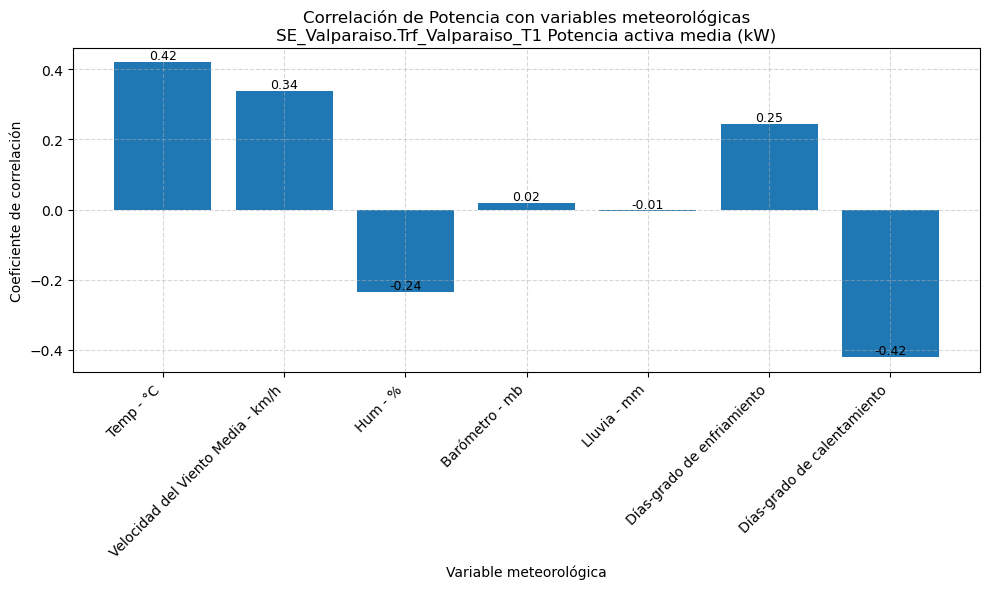

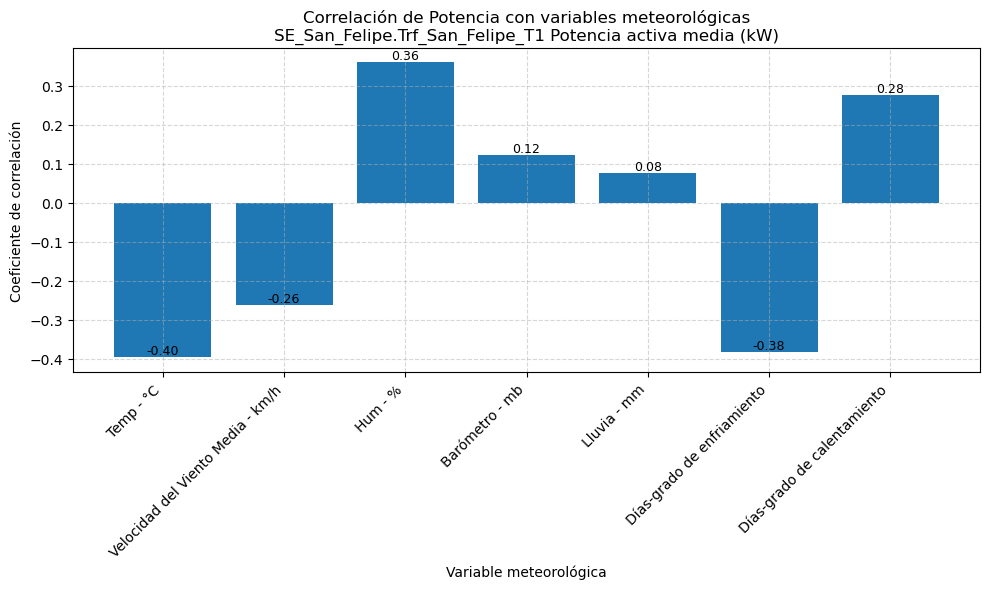

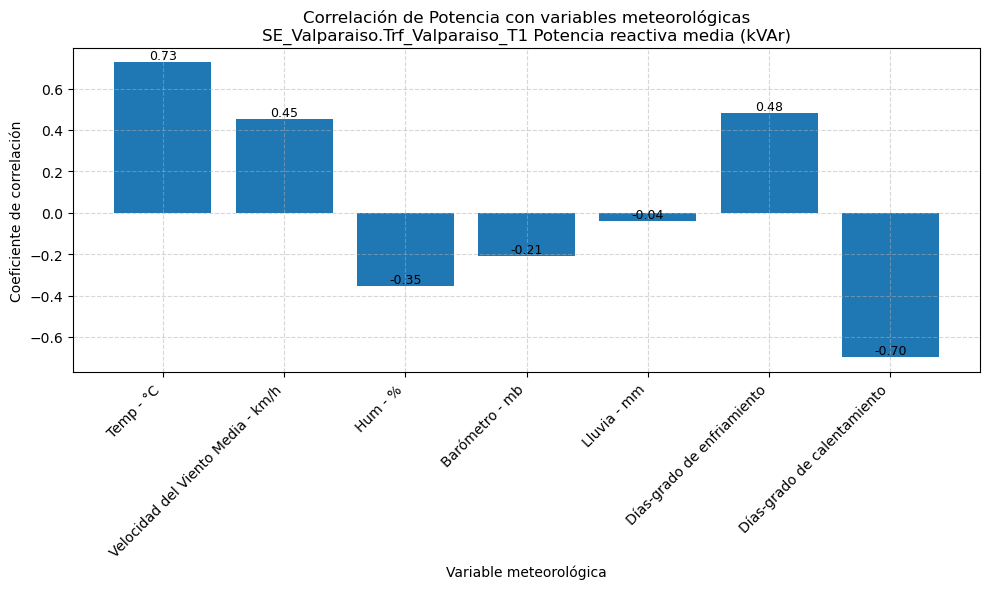

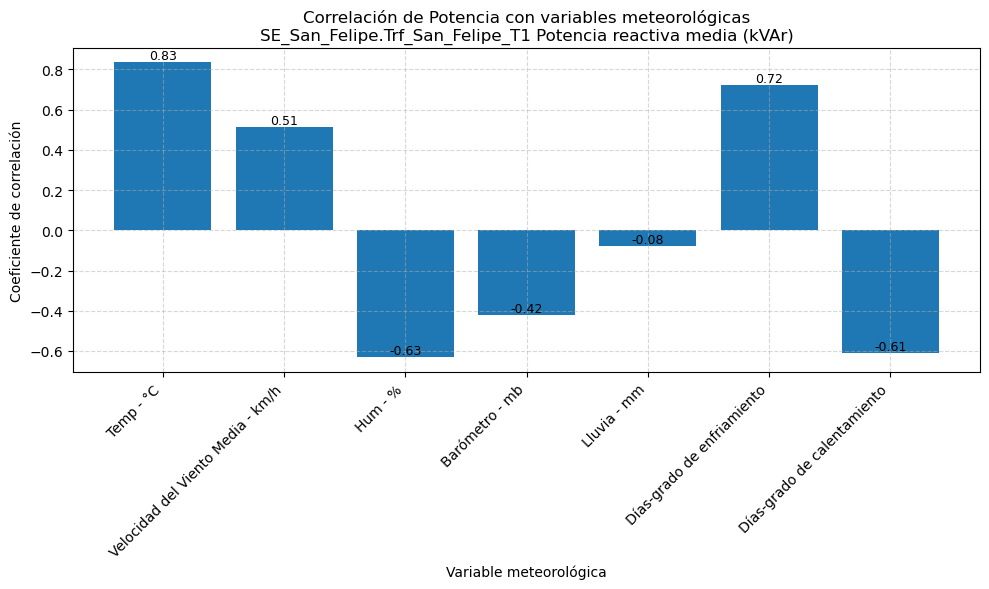

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Transformar el dataframe 'df_transformadores' a formato largo
transformador_filtrado_long = pd.melt(
    df_transformadores,
    id_vars=['Fecha y hora'],
    value_vars=[col for col in df_transformadores.columns if col != 'Fecha y hora'],
    var_name='Nombre_Transformador',
    value_name='Potencia'
)

# Unir con la tabla transformadores_estacion para agregar la estación meteorológica
transformador_filtrado_long = pd.merge(
    transformador_filtrado_long,
    transformadores_estacion,
    on='Nombre_Transformador'
)

# Asegurarse de que las fechas están en el mismo formato
transformador_filtrado_long['Fecha y hora'] = pd.to_datetime(transformador_filtrado_long['Fecha y hora'])
df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'])

# Unir con df_meteorologico utilizando la fecha y la estación meteorológica
df_completo = pd.merge(
    transformador_filtrado_long,
    df_meteorologico,
    left_on=['Fecha y hora', 'Estacion_Meteorologica'],
    right_on=['Date & Time', 'Estacion']
)

# Lista de transformadores a analizar
transformadores_columns = [
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)', 
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)', 
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)', 
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'
]

# Calcular y graficar la correlación de la potencia con variables meteorológicas
for transformador in transformadores_columns:
    df_transformador = df_completo[df_completo['Nombre_Transformador'] == transformador].copy()

    # Asegurarse de que 'Potencia' sea numérica
    df_transformador['Potencia'] = pd.to_numeric(df_transformador['Potencia'], errors='coerce')

    # Seleccionar solo columnas numéricas
    df_numerico = df_transformador.select_dtypes(include=['float64', 'int64'])

    # Verificar que 'Potencia' está incluida y hay al menos otra columna para correlacionar
    if 'Potencia' not in df_numerico.columns or df_numerico.shape[1] < 2:
        print(f"No hay suficientes datos numéricos para calcular correlaciones para {transformador}.")
        continue

    # Calcular correlación de 'Potencia' con las demás variables meteorológicas
    correlaciones = df_numerico.corr()['Potencia'].drop('Potencia')  # Quitamos autocorrelación

    # Gráfico de barras verticales
    plt.figure(figsize=(10, 6))
    bars = plt.bar(correlaciones.index, correlaciones.values)

    # Añadir etiquetas con los valores numéricos encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval,
                 f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

    plt.title(f'Correlación de Potencia con variables meteorológicas\n{transformador}')
    plt.ylabel('Coeficiente de correlación')
    plt.xlabel('Variable meteorológica')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



# **Instalación de librerias**

In [18]:
!pip install prophet

In [19]:
from prophet import Prophet
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Modelos San Felipe**

## Modelo parametros automaticos

In [22]:
def calcular_mape(y_true, y_pred, min_denominador=1.0):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true >= min_denominador
    if np.any(mask):
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        return np.nan

In [23]:
def ejecutar_modelo_prophet(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)
  

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con parámetros por defecto
    m = Prophet()
    m.fit(df_train)

    # Construir future con fechas necesarias (eval + test)
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')

    # Predecir
    forecast = m.predict(future)

    # Separar resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico test
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f" Test desde: {fecha_inicio_test.date()}")
    print(" TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print(" TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



 Evaluando P para 2025-03-17


11:08:24 - cmdstanpy - INFO - Chain [1] start processing
11:08:30 - cmdstanpy - INFO - Chain [1] done processing


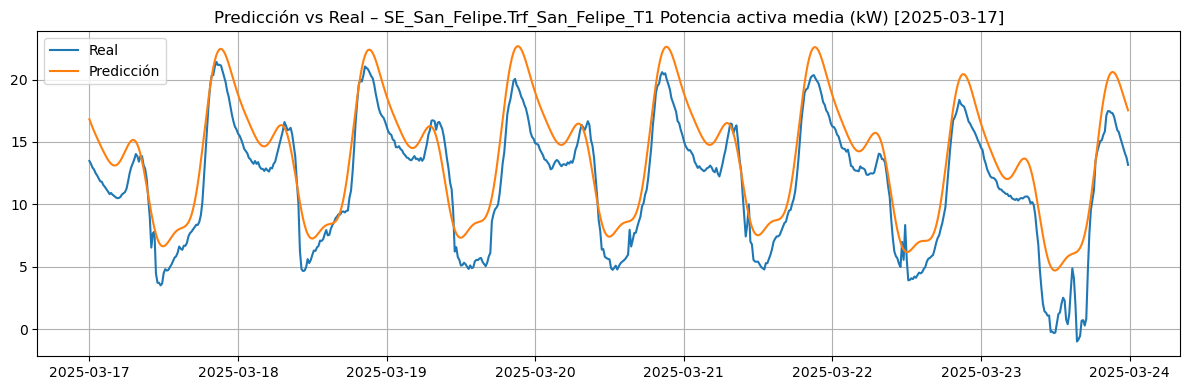

 Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  1.213 | RMSE: 1.663 | MAPE: 17.01%
 TEST (semana actual):
  MAE:  2.252 | RMSE: 2.532 | MAPE: 26.70%

 Evaluando Q para 2025-03-17


11:08:31 - cmdstanpy - INFO - Chain [1] start processing
11:08:39 - cmdstanpy - INFO - Chain [1] done processing


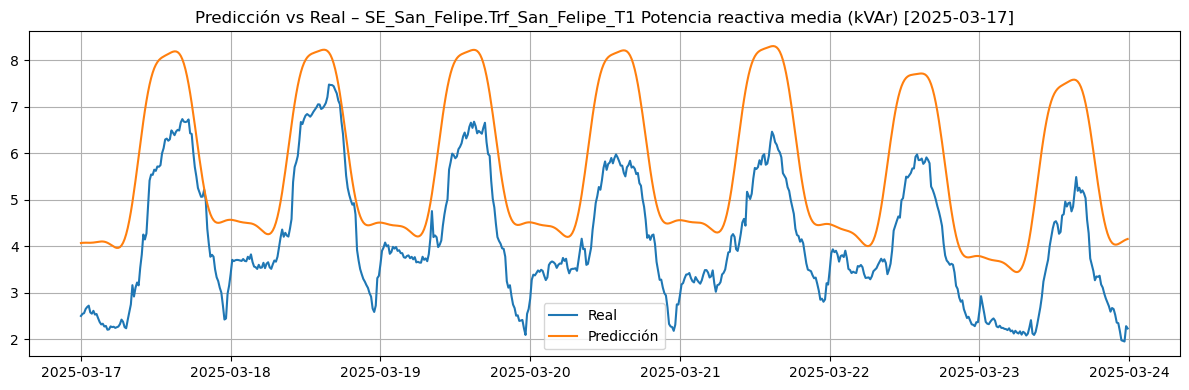

 Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.481 | RMSE: 0.602 | MAPE: 12.13%
 TEST (semana actual):
  MAE:  1.534 | RMSE: 1.675 | MAPE: 41.01%

 Evaluando P para 2025-01-13


11:08:40 - cmdstanpy - INFO - Chain [1] start processing
11:08:48 - cmdstanpy - INFO - Chain [1] done processing


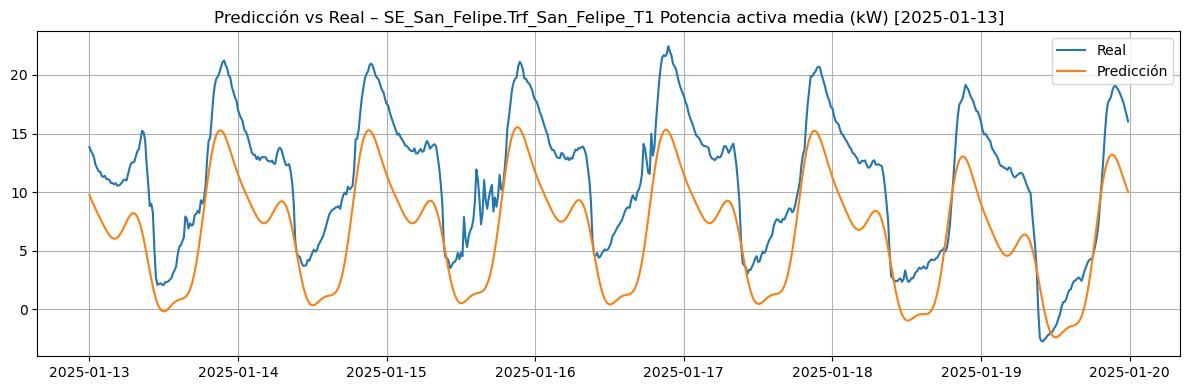

 Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  2.810 | RMSE: 3.225 | MAPE: 40.14%
 TEST (semana actual):
  MAE:  4.608 | RMSE: 4.987 | MAPE: 49.09%

 Evaluando Q para 2025-01-13


11:08:49 - cmdstanpy - INFO - Chain [1] start processing
11:08:55 - cmdstanpy - INFO - Chain [1] done processing


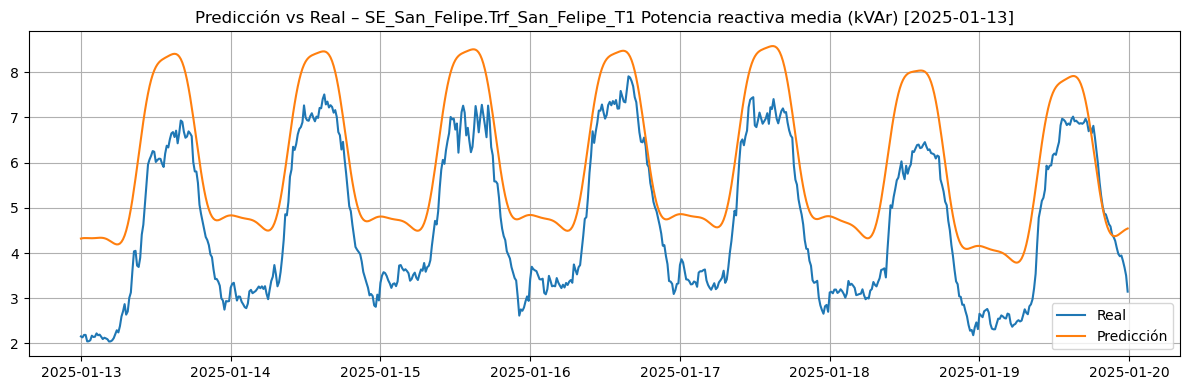

 Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.799 | RMSE: 0.891 | MAPE: 20.29%
 TEST (semana actual):
  MAE:  1.306 | RMSE: 1.389 | MAPE: 34.32%

 Evaluando P para 2024-10-21


11:08:55 - cmdstanpy - INFO - Chain [1] start processing
11:08:59 - cmdstanpy - INFO - Chain [1] done processing


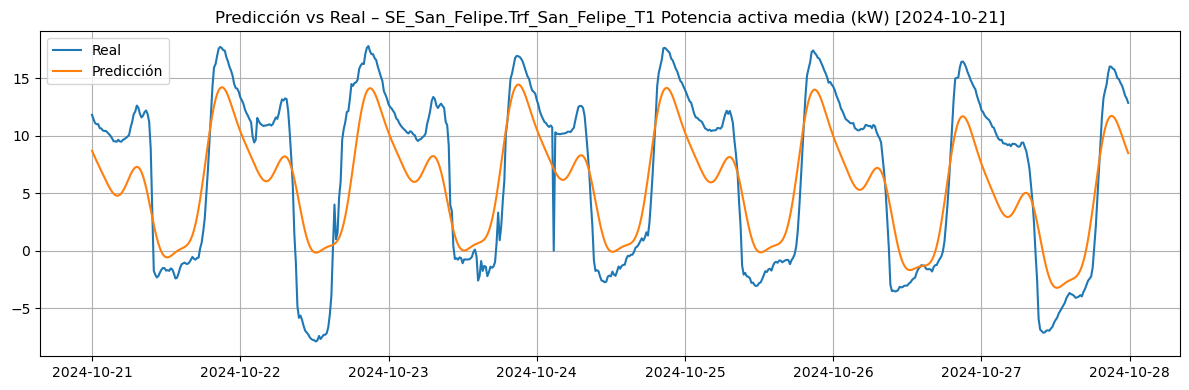

 Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  3.049 | RMSE: 4.009 | MAPE: 27.67%
 TEST (semana actual):
  MAE:  3.550 | RMSE: 3.972 | MAPE: 39.92%

 Evaluando Q para 2024-10-21


11:09:00 - cmdstanpy - INFO - Chain [1] start processing
11:09:05 - cmdstanpy - INFO - Chain [1] done processing


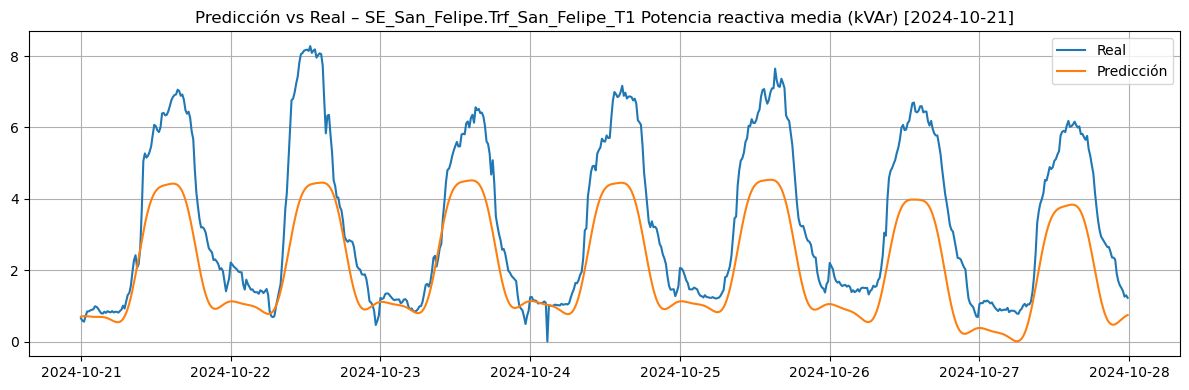

11:09:05 - cmdstanpy - INFO - Chain [1] start processing


 Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.536 | RMSE: 0.685 | MAPE: 28.11%
 TEST (semana actual):
  MAE:  1.265 | RMSE: 1.576 | MAPE: 37.84%

 Evaluando P para 2024-07-10


11:09:08 - cmdstanpy - INFO - Chain [1] done processing


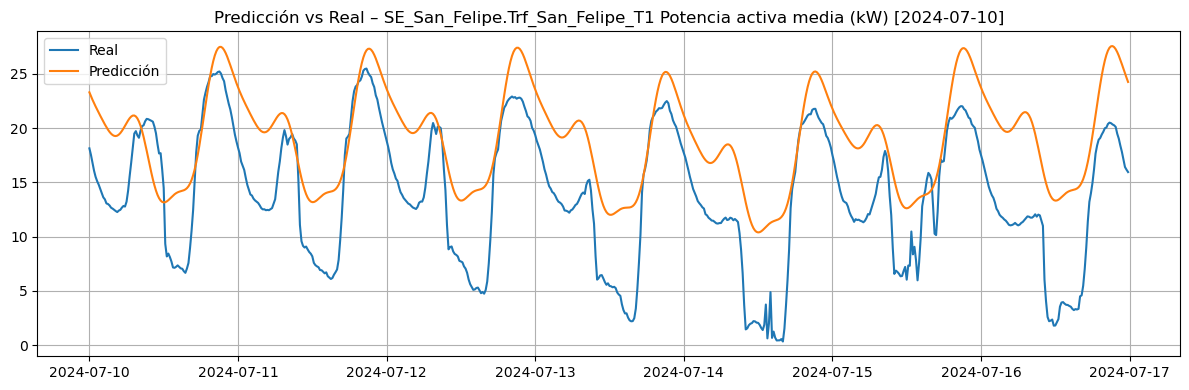

 Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  4.211 | RMSE: 5.047 | MAPE: 27.89%
 TEST (semana actual):
  MAE:  5.524 | RMSE: 6.189 | MAPE: 75.13%

 Evaluando Q para 2024-07-10


11:09:09 - cmdstanpy - INFO - Chain [1] start processing
11:09:14 - cmdstanpy - INFO - Chain [1] done processing


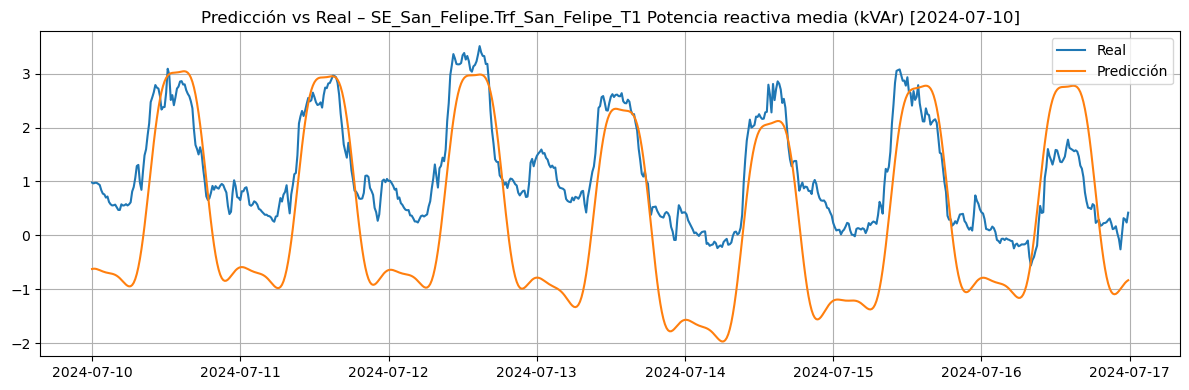

 Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.937 | RMSE: 1.155 | MAPE: 53.49%
 TEST (semana actual):
  MAE:  1.056 | RMSE: 1.221 | MAPE: 47.11%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.213024    1.662703   17.010707  2.251592   2.531800   
1        2025-01-13   2.809581    3.225415   40.141800  4.607563   4.987017   
2        2024-10-21   3.049191    4.008791   27.667407  3.549865   3.971856   
3        2024-07-10   4.211209    5.046851   27.894407  5.523853   6.188704   

   MAPE_test  
0  26.701679  
1  49.085574  
2  39.920779  
3  75.132935  

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.481207    0.601576   12.127411  1.534243   1.674800   
1        2025-01-13   0.799170    0.890757   20.287251  1.305823   1.389368   
2        2024-10-21   0.535742    0.685286   28.107012  1.2

In [24]:
# Lista de fechas a evaluar
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'
columna_q = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'

# Lista para guardar resultados
resultados_p = []
resultados_q = []

# Evaluar cada fecha
for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet(df_transformadores, columna_p, fecha)
    resultados_p.append(resultado_p)

    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet(df_transformadores, columna_q, fecha)
    resultados_q.append(resultado_q)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)

## Modelo base + regresor estacion 

In [26]:
def ejecutar_modelo_prophet_parametros_estacion(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna, 'estacion']].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Convertir 'estacion' en dummies
    df_prophet = pd.get_dummies(df_prophet, columns=['estacion'], prefix='est')
    columnas_estacion = [col for col in df_prophet.columns if col.startswith('est_')]

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Filtrar conjuntos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con valores por defecto
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )

    # Añadir regresores de estación
    for col in columnas_estacion:
        m.add_regressor(col)

    # Entrenar
    m.fit(df_train)

    # Preparar fechas futuras con regresores
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds'] + columnas_estacion], on='ds', how='left')

    # Predecir
    forecast = m.predict(future)

    # Evaluación
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f"Test desde: {fecha_inicio_test.date()}")
    print(" TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print(" TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }




 Evaluando P para 2025-03-17


11:09:15 - cmdstanpy - INFO - Chain [1] start processing
11:09:22 - cmdstanpy - INFO - Chain [1] done processing


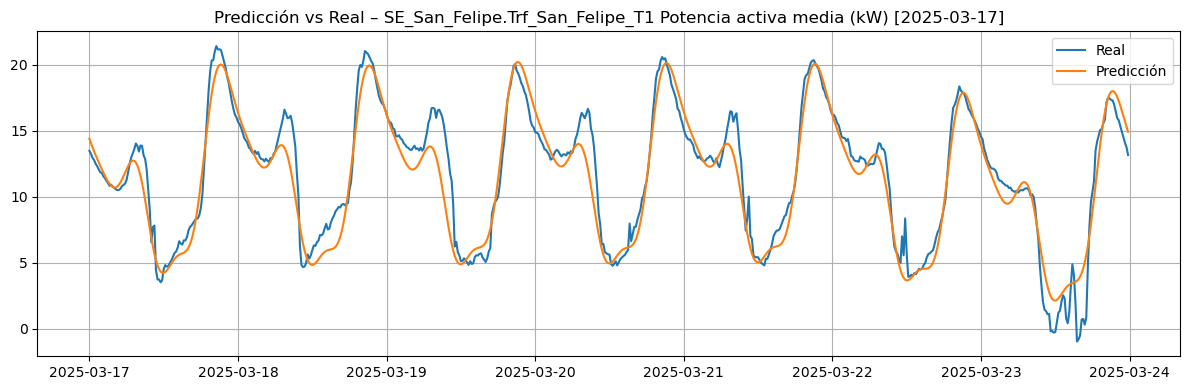

Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  1.293 | RMSE: 1.646 | MAPE: 16.61%
 TEST (semana actual):
  MAE:  1.094 | RMSE: 1.511 | MAPE: 11.36%

 Evaluando Q para 2025-03-17


11:09:23 - cmdstanpy - INFO - Chain [1] start processing
11:09:38 - cmdstanpy - INFO - Chain [1] done processing


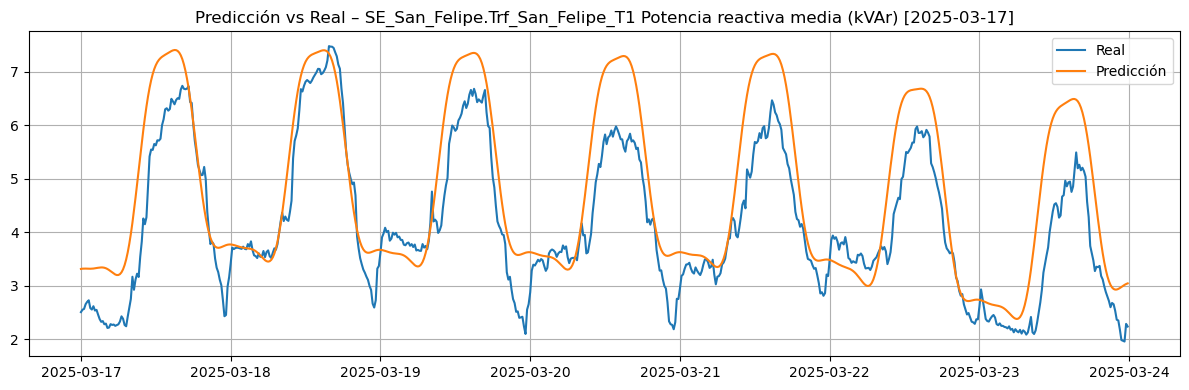

Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.499 | RMSE: 0.622 | MAPE: 11.01%
 TEST (semana actual):
  MAE:  0.710 | RMSE: 0.891 | MAPE: 18.38%

 Evaluando P para 2025-01-13


11:09:39 - cmdstanpy - INFO - Chain [1] start processing
11:09:42 - cmdstanpy - INFO - Chain [1] done processing


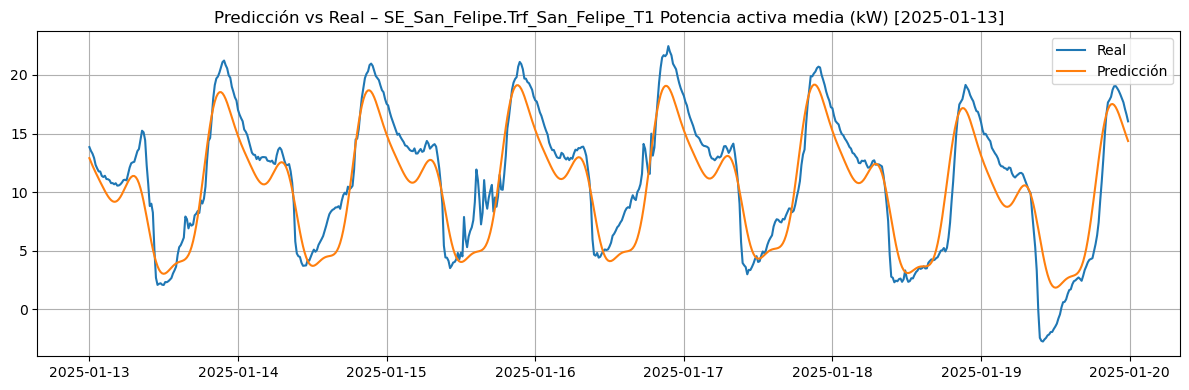

Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  2.055 | RMSE: 2.479 | MAPE: 35.20%
 TEST (semana actual):
  MAE:  1.950 | RMSE: 2.347 | MAPE: 21.74%

 Evaluando Q para 2025-01-13


11:09:43 - cmdstanpy - INFO - Chain [1] start processing
11:09:51 - cmdstanpy - INFO - Chain [1] done processing


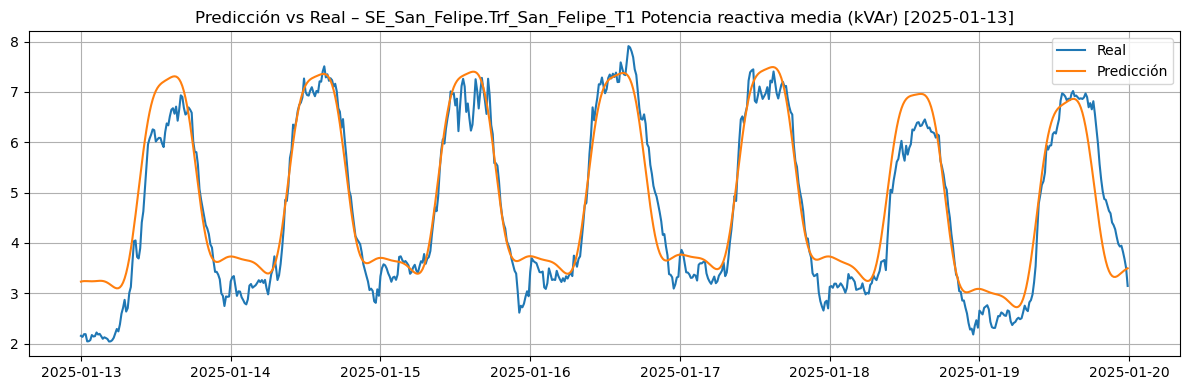

Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.803 | RMSE: 0.895 | MAPE: 20.27%
 TEST (semana actual):
  MAE:  0.421 | RMSE: 0.537 | MAPE: 11.17%

 Evaluando P para 2024-10-21


11:09:52 - cmdstanpy - INFO - Chain [1] start processing
11:09:56 - cmdstanpy - INFO - Chain [1] done processing


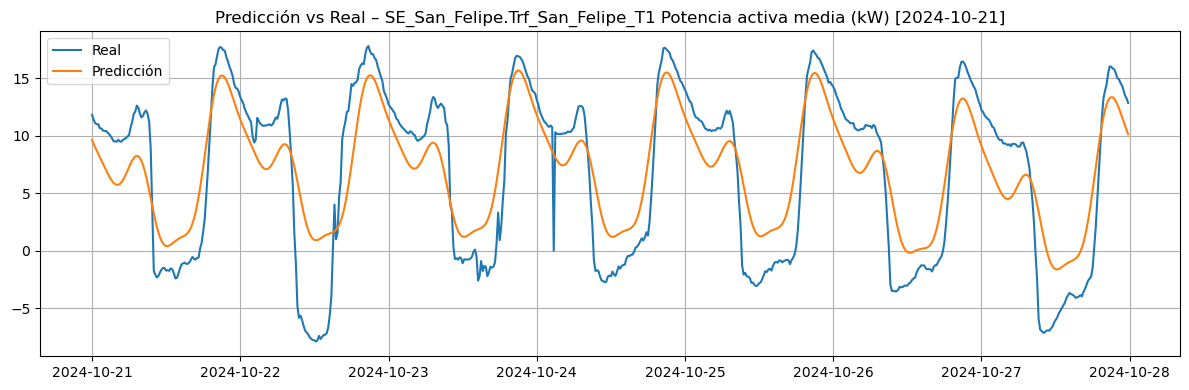

Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  3.230 | RMSE: 4.043 | MAPE: 30.99%
 TEST (semana actual):
  MAE:  3.355 | RMSE: 3.857 | MAPE: 34.59%

 Evaluando Q para 2024-10-21


11:09:57 - cmdstanpy - INFO - Chain [1] start processing
11:10:05 - cmdstanpy - INFO - Chain [1] done processing


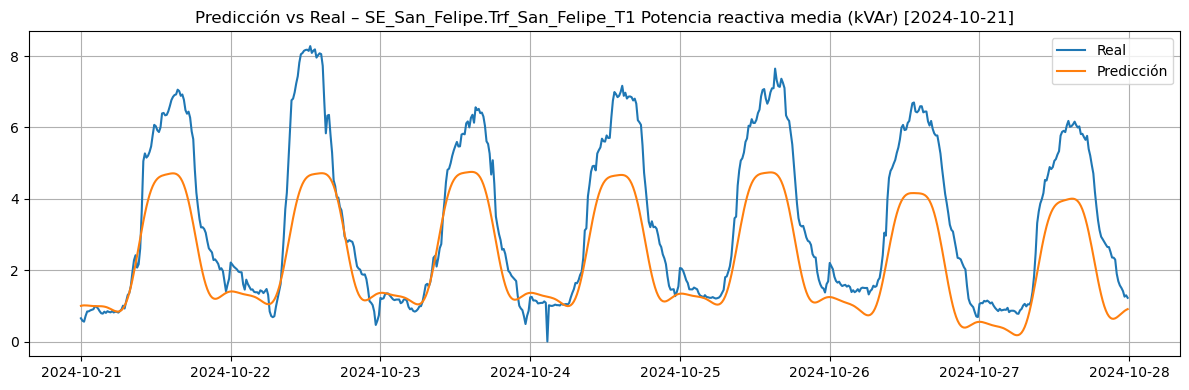

Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.464 | RMSE: 0.614 | MAPE: 22.90%
 TEST (semana actual):
  MAE:  1.090 | RMSE: 1.410 | MAPE: 30.61%

 Evaluando P para 2024-07-10


11:10:06 - cmdstanpy - INFO - Chain [1] start processing
11:10:06 - cmdstanpy - INFO - Chain [1] done processing


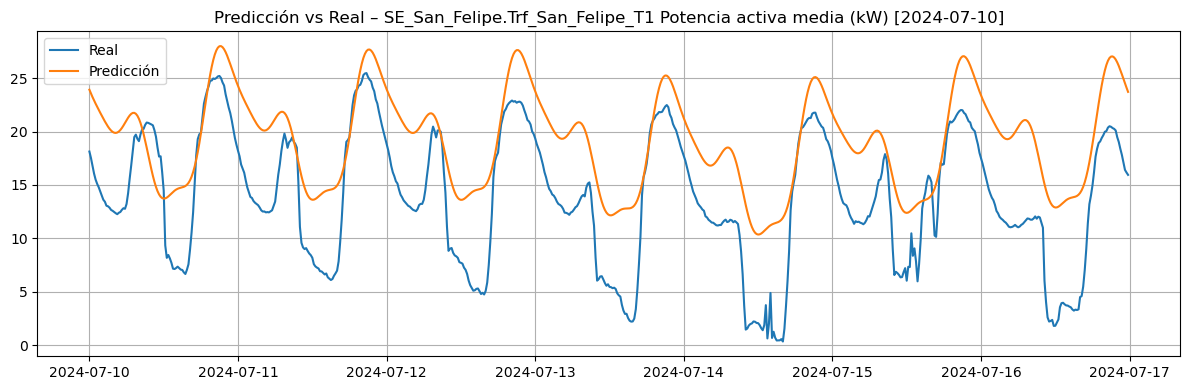

Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  4.225 | RMSE: 5.045 | MAPE: 28.19%
 TEST (semana actual):
  MAE:  5.583 | RMSE: 6.233 | MAPE: 75.40%

 Evaluando Q para 2024-07-10


11:10:07 - cmdstanpy - INFO - Chain [1] start processing
11:10:08 - cmdstanpy - INFO - Chain [1] done processing


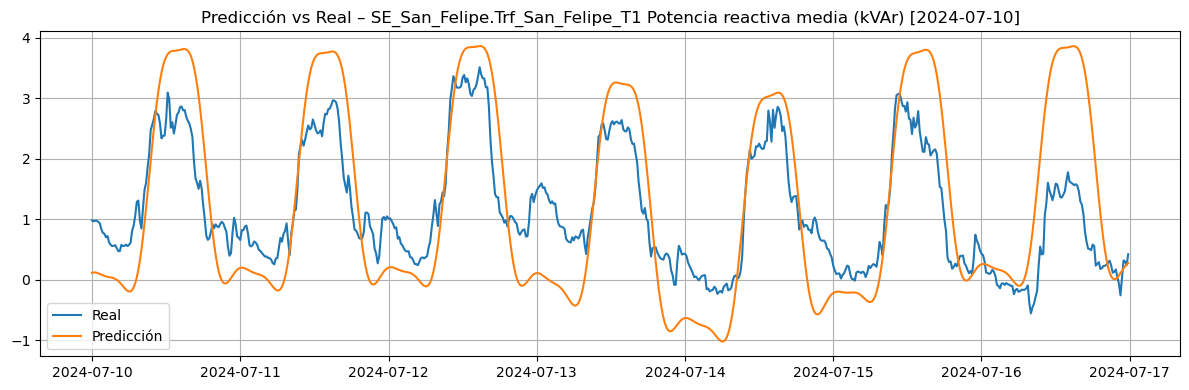

Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.857 | RMSE: 1.135 | MAPE: 50.80%
 TEST (semana actual):
  MAE:  0.768 | RMSE: 0.934 | MAPE: 55.11%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.292677    1.646217   16.612656  1.094139   1.510639   
1        2025-01-13   2.055106    2.479303   35.196217  1.950299   2.346728   
2        2024-10-21   3.229875    4.042790   30.988533  3.355398   3.857419   
3        2024-07-10   4.224616    5.045277   28.186354  5.582785   6.233383   

   MAPE_test variable  
0  11.362487        P  
1  21.743377        P  
2  34.587124        P  
3  75.395430        P  

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.499403    0.621819   11.013549  0.709889   0.890773   
1        2025-01-13   0.803149    0.895220   20.269405  0.421151   0.536570   
2        2024-1

In [27]:
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'
columna_q = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'

resultados_p = []
resultados_q = []

for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_estacion(df_transformadores, columna_p, fecha)
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet_parametros_estacion(df_transformadores, columna_q, fecha)
    resultado_q['fecha_inicio_test'] = fecha
    resultado_q['variable'] = 'Q'
    resultados_q.append(resultado_q)

df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)


## Modelo base + regresor estacion + meteo

In [29]:
def ejecutar_modelo_prophet_parametros_estacion_meteo(df, columna_objetivo, fecha_inicio_test, df_meteorologico, nombre_estacion):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna_objetivo, 'estacion']].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna_objetivo: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Añadir temperatura desde df_meteorologico
    df_meteorologico_estacion = df_meteorologico[df_meteorologico['Estacion'] == nombre_estacion].copy()
    df_meteorologico_estacion['Date & Time'] = pd.to_datetime(df_meteorologico_estacion['Date & Time'])
    df_prophet = df_prophet.merge(df_meteorologico_estacion[['Date & Time', 'Temp - °C']],
                                  left_on='ds', right_on='Date & Time', how='left').drop(columns=['Date & Time'])
    df_prophet.rename(columns={'Temp - °C': 'temp'}, inplace=True)

    # Dummies de estación
    dummies_estacion = pd.get_dummies(df_prophet['estacion'], prefix='estacion')
    df_prophet = pd.concat([df_prophet, dummies_estacion], axis=1)
    regresores = ['temp'] + dummies_estacion.columns.tolist()

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con valores por defecto
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )

    for reg in regresores:
        m.add_regressor(reg)

    m.fit(df_train[['ds', 'y'] + regresores])

    # Construir future
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds'] + regresores], on='ds', how='left')

    forecast = m.predict(future)

    # Resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna_objetivo} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



Evaluando P para 2025-03-17


11:10:09 - cmdstanpy - INFO - Chain [1] start processing
11:10:18 - cmdstanpy - INFO - Chain [1] done processing


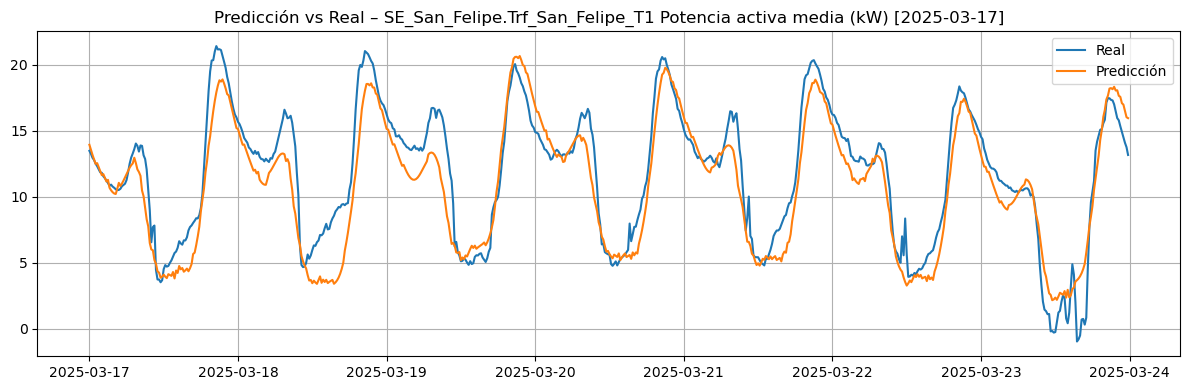


Evaluando Q para 2025-03-17


11:10:19 - cmdstanpy - INFO - Chain [1] start processing
11:10:31 - cmdstanpy - INFO - Chain [1] done processing


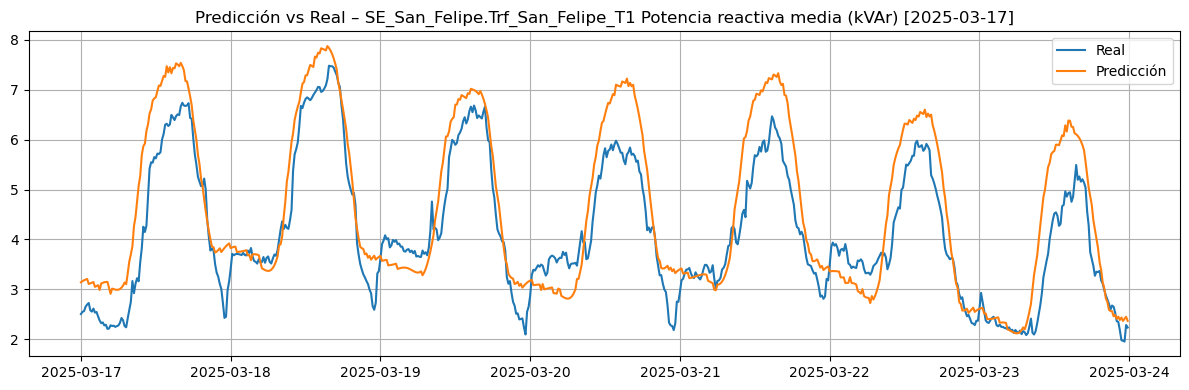


Evaluando P para 2025-01-13


11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:41 - cmdstanpy - INFO - Chain [1] done processing


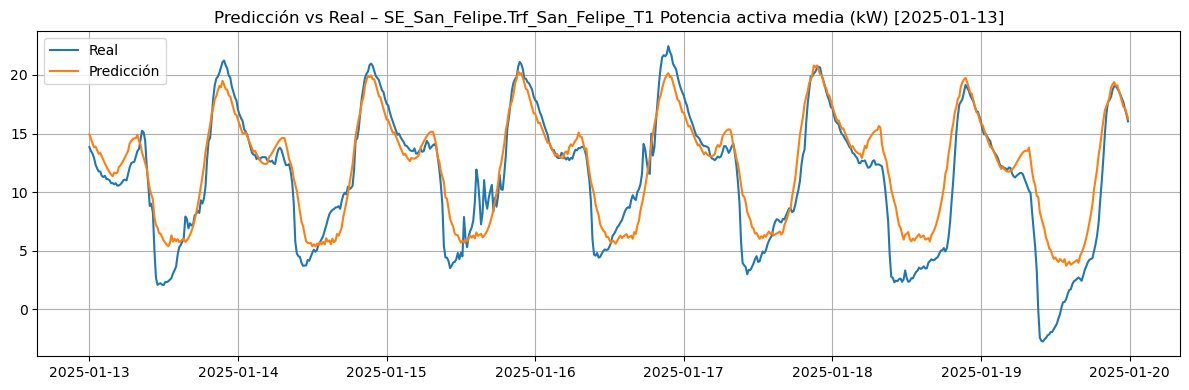


Evaluando Q para 2025-01-13


11:10:42 - cmdstanpy - INFO - Chain [1] start processing
11:10:51 - cmdstanpy - INFO - Chain [1] done processing


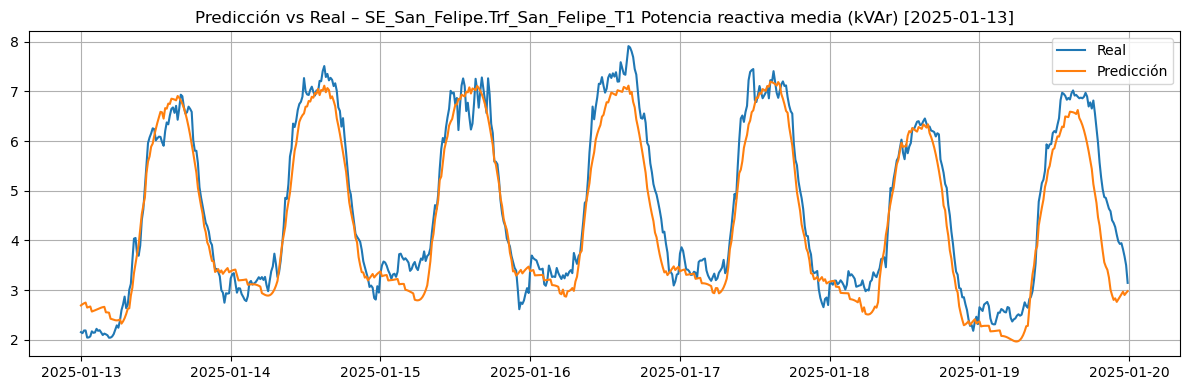


Evaluando P para 2024-10-21


11:10:52 - cmdstanpy - INFO - Chain [1] start processing
11:10:58 - cmdstanpy - INFO - Chain [1] done processing


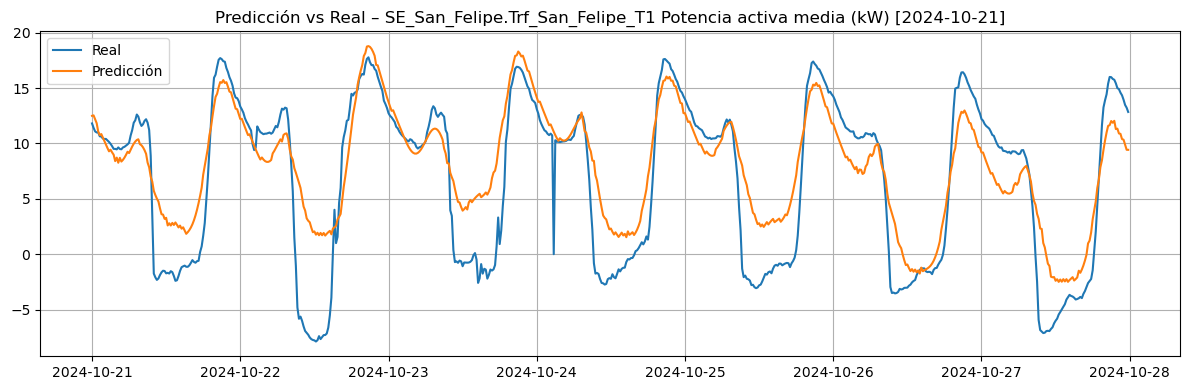


Evaluando Q para 2024-10-21


11:10:59 - cmdstanpy - INFO - Chain [1] start processing
11:11:07 - cmdstanpy - INFO - Chain [1] done processing


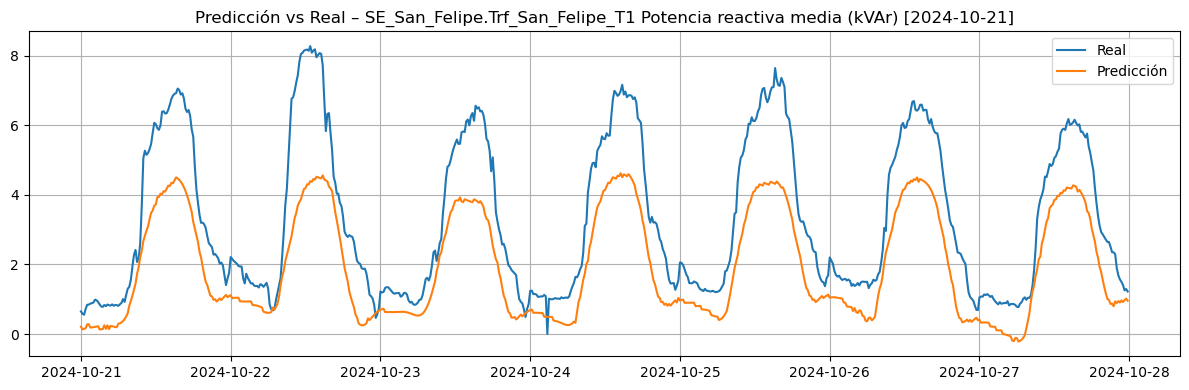


Evaluando P para 2024-07-10


11:11:08 - cmdstanpy - INFO - Chain [1] start processing
11:11:09 - cmdstanpy - INFO - Chain [1] done processing


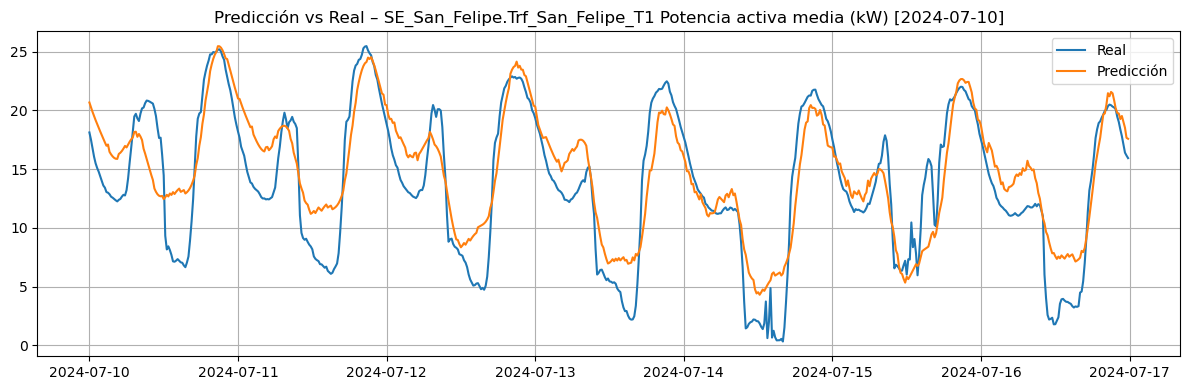


Evaluando Q para 2024-07-10


11:11:09 - cmdstanpy - INFO - Chain [1] start processing
11:11:11 - cmdstanpy - INFO - Chain [1] done processing


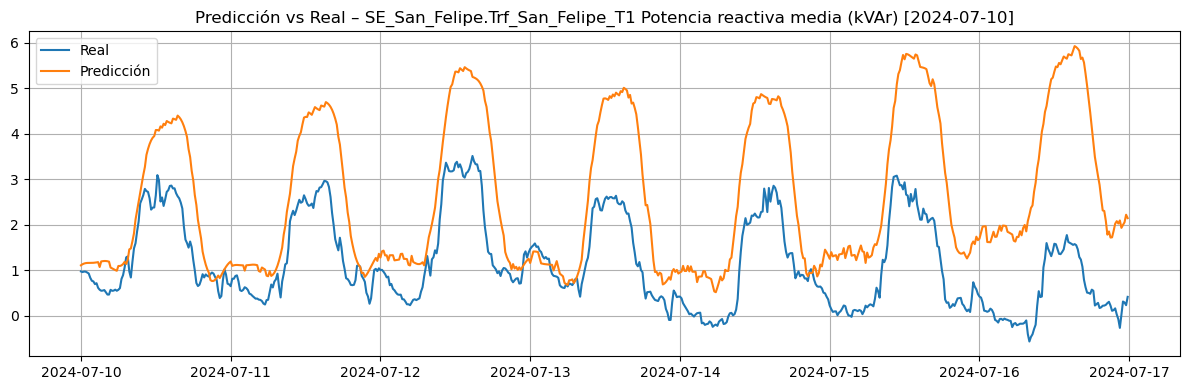


Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.682432    2.082648   20.708628  1.571578   2.005208   
1        2025-01-13   2.094409    2.585907   35.518342  1.771809   2.474058   
2        2024-10-21   3.207468    4.063018   30.446419  2.998632   3.884133   
3        2024-07-10   3.633624    4.719194   23.095532  2.591699   3.079504   

   MAPE_test variable  
0  15.746905        P  
1  28.031593        P  
2  27.181806        P  
3  33.283666        P  

Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.408803    0.500451    9.550191  0.616872   0.757431   
1        2025-01-13   0.692204    0.776406   18.015347  0.381126   0.478398   
2        2024-10-21   0.425224    0.543056   21.515730  1.366202   1.596532   
3        2024-07-10   0.655367    0.894400   39.981266  1.447640   1.783695   

    MAPE_test variab

In [30]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'
columna_q = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'

# Nombre de estación meteorológica asociada al transformador
nombre_estacion = 'Los Andes'

# Resultados
resultados_p = []
resultados_q = []

for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_estacion_meteo(
        df_transformadores,
        columna_objetivo=columna_p,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

    print(f"\nEvaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet_parametros_estacion_meteo(
        df_transformadores,
        columna_objetivo=columna_q,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_q['fecha_inicio_test'] = fecha
    resultado_q['variable'] = 'Q'
    resultados_q.append(resultado_q)

# Convertir resultados a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\nResultados Potencia Activa (P):")
print(df_resultados_p)

print("\nResultados Potencia Reactiva (Q):")
print(df_resultados_q)


# **Modelos Valparaiso**

## Modelo parametros automaticos


 Evaluando P para 2025-03-17


11:11:12 - cmdstanpy - INFO - Chain [1] start processing
11:11:22 - cmdstanpy - INFO - Chain [1] done processing


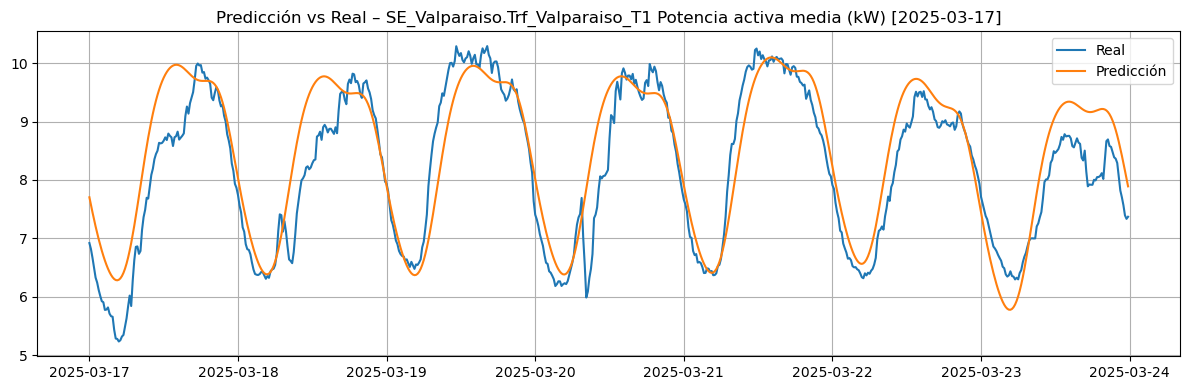

 Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.393 | RMSE: 0.698 | MAPE: 5.61%
 TEST (semana actual):
  MAE:  0.468 | RMSE: 0.606 | MAPE: 6.01%

 Evaluando Q para 2025-03-17


11:11:23 - cmdstanpy - INFO - Chain [1] start processing
11:11:32 - cmdstanpy - INFO - Chain [1] done processing


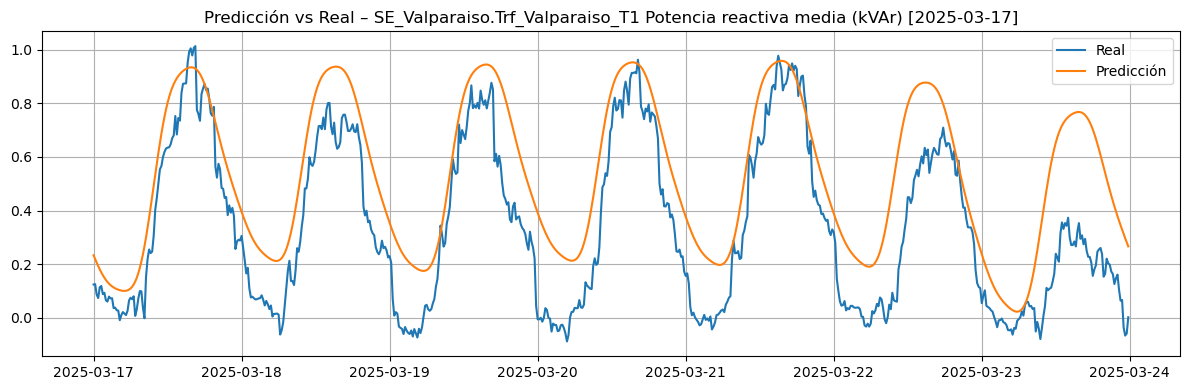

 Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.193 | RMSE: 0.223 | MAPE: nan%
 TEST (semana actual):
  MAE:  0.191 | RMSE: 0.222 | MAPE: 7.57%

 Evaluando P para 2025-01-13


11:11:32 - cmdstanpy - INFO - Chain [1] start processing
11:11:41 - cmdstanpy - INFO - Chain [1] done processing


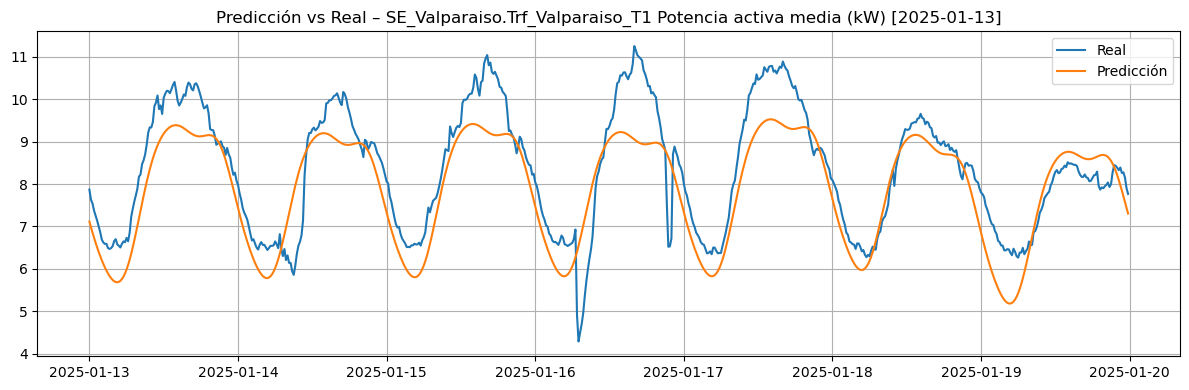

 Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.870 | RMSE: 1.024 | MAPE: 12.89%
 TEST (semana actual):
  MAE:  0.667 | RMSE: 0.799 | MAPE: 8.24%

 Evaluando Q para 2025-01-13


11:11:42 - cmdstanpy - INFO - Chain [1] start processing
11:11:47 - cmdstanpy - INFO - Chain [1] done processing


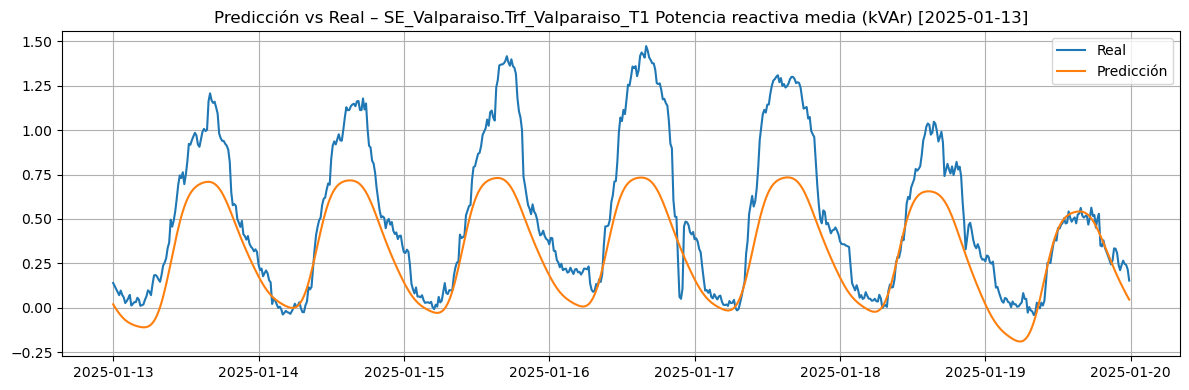

 Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.221 | RMSE: 0.295 | MAPE: 46.39%
 TEST (semana actual):
  MAE:  0.208 | RMSE: 0.274 | MAPE: 43.04%

 Evaluando P para 2024-10-21


11:11:48 - cmdstanpy - INFO - Chain [1] start processing
11:11:53 - cmdstanpy - INFO - Chain [1] done processing


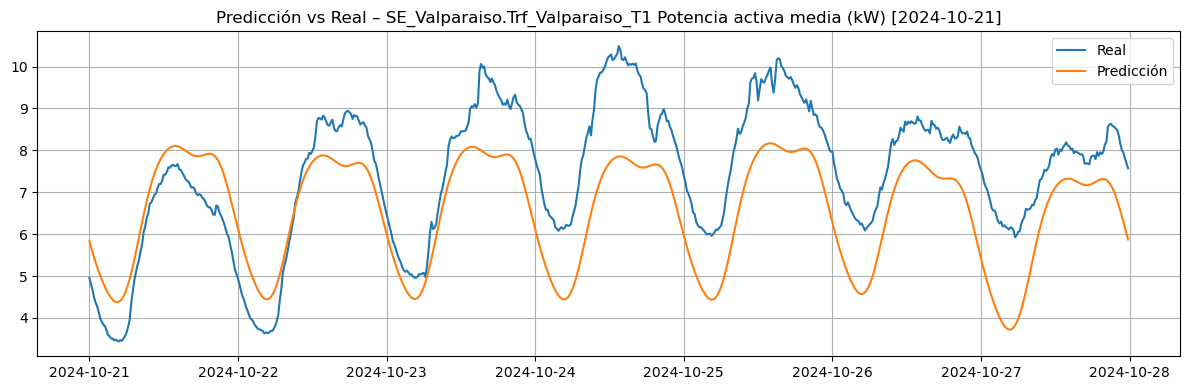

 Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  1.195 | RMSE: 1.379 | MAPE: 16.59%
 TEST (semana actual):
  MAE:  1.226 | RMSE: 1.355 | MAPE: 16.87%

 Evaluando Q para 2024-10-21


11:11:53 - cmdstanpy - INFO - Chain [1] start processing
11:11:59 - cmdstanpy - INFO - Chain [1] done processing


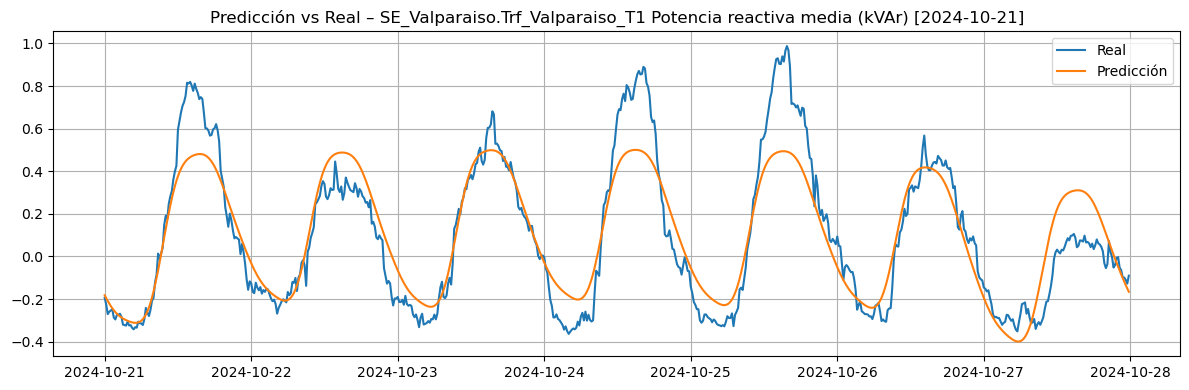

11:12:00 - cmdstanpy - INFO - Chain [1] start processing


 Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.103 | RMSE: 0.128 | MAPE: nan%
 TEST (semana actual):
  MAE:  0.108 | RMSE: 0.143 | MAPE: nan%

 Evaluando P para 2024-07-10


11:12:05 - cmdstanpy - INFO - Chain [1] done processing


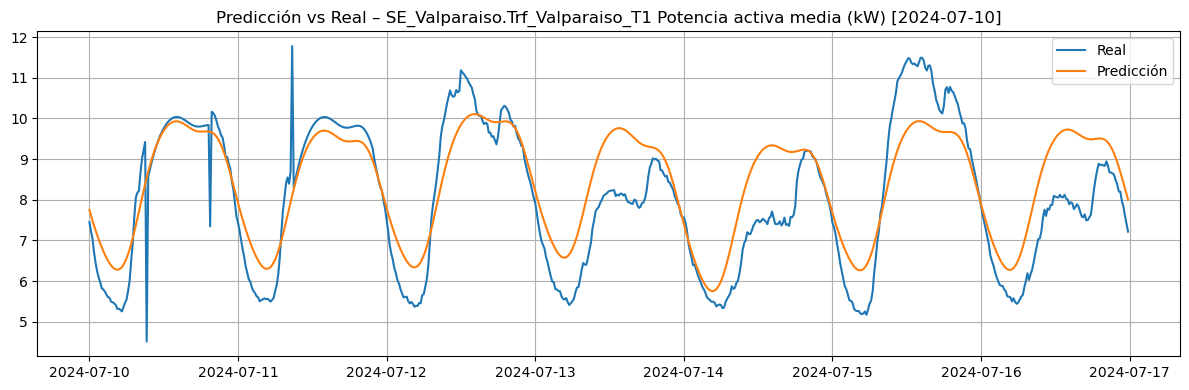

11:12:05 - cmdstanpy - INFO - Chain [1] start processing


 Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.792 | RMSE: 1.024 | MAPE: 10.97%
 TEST (semana actual):
  MAE:  0.778 | RMSE: 0.970 | MAPE: 10.58%

 Evaluando Q para 2024-07-10


11:12:10 - cmdstanpy - INFO - Chain [1] done processing


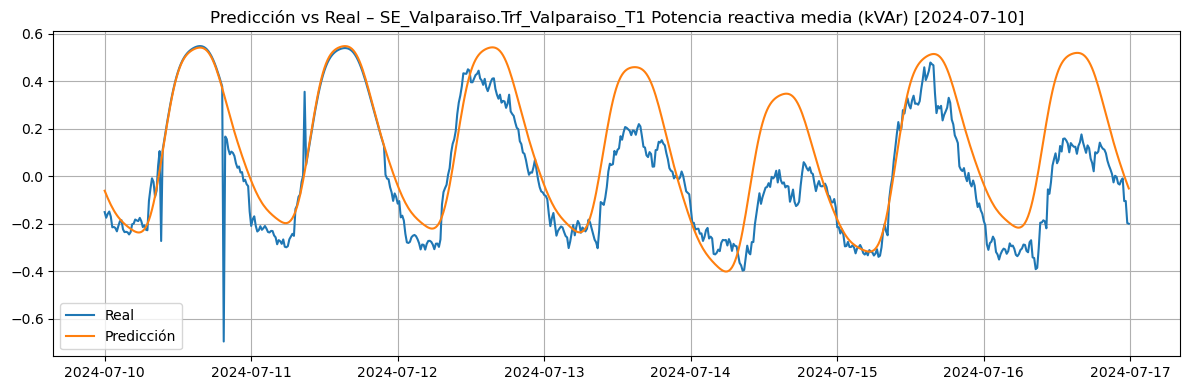

 Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.108 | RMSE: 0.133 | MAPE: nan%
 TEST (semana actual):
  MAE:  0.122 | RMSE: 0.169 | MAPE: nan%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.392855    0.697806    5.607959  0.467889   0.606148   
1        2025-01-13   0.870091    1.024077   12.888918  0.666740   0.799478   
2        2024-10-21   1.195198    1.378983   16.586901  1.226025   1.354521   
3        2024-07-10   0.791505    1.024332   10.971672  0.777947   0.969565   

   MAPE_test  
0   6.008747  
1   8.239144  
2  16.866857  
3  10.576145  

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.193450    0.223368         NaN  0.191133   0.222276   
1        2025-01-13   0.221123    0.295454    46.38834  0.207826   0.274341   
2        2024-10-21   0.103456    0.128282         NaN  0.10850

In [33]:
# Lista de fechas a evaluar
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)'
columna_q = 'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)'

# Lista para guardar resultados
resultados_p = []
resultados_q = []

# Evaluar cada fecha
for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet(df_transformadores, columna_p, fecha)
    resultados_p.append(resultado_p)

    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet(df_transformadores, columna_q, fecha)
    resultados_q.append(resultado_q)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)

## Modelo base + regresor estacion


 Evaluando P para 2025-03-17


11:12:11 - cmdstanpy - INFO - Chain [1] start processing
11:12:44 - cmdstanpy - INFO - Chain [1] done processing


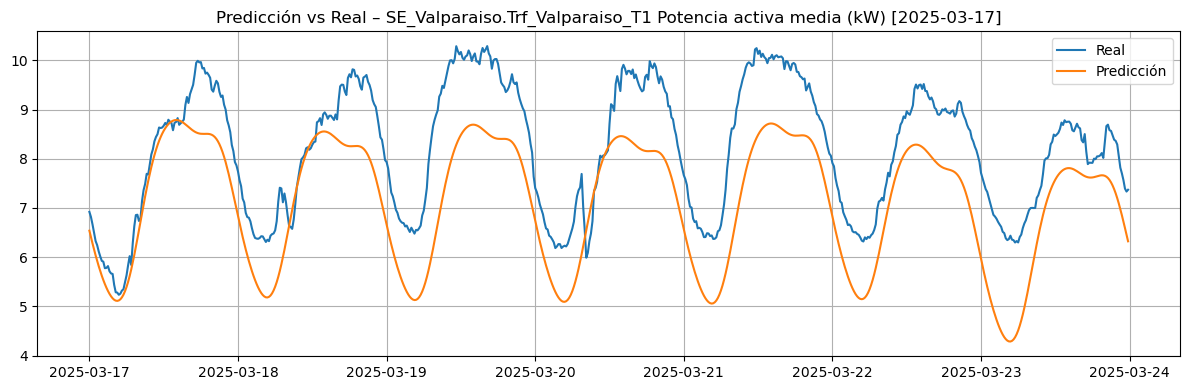

Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.443 | RMSE: 0.681 | MAPE: 6.22%
 TEST (semana actual):
  MAE:  1.090 | RMSE: 1.216 | MAPE: 13.39%

 Evaluando Q para 2025-03-17


11:12:45 - cmdstanpy - INFO - Chain [1] start processing
11:13:13 - cmdstanpy - INFO - Chain [1] done processing


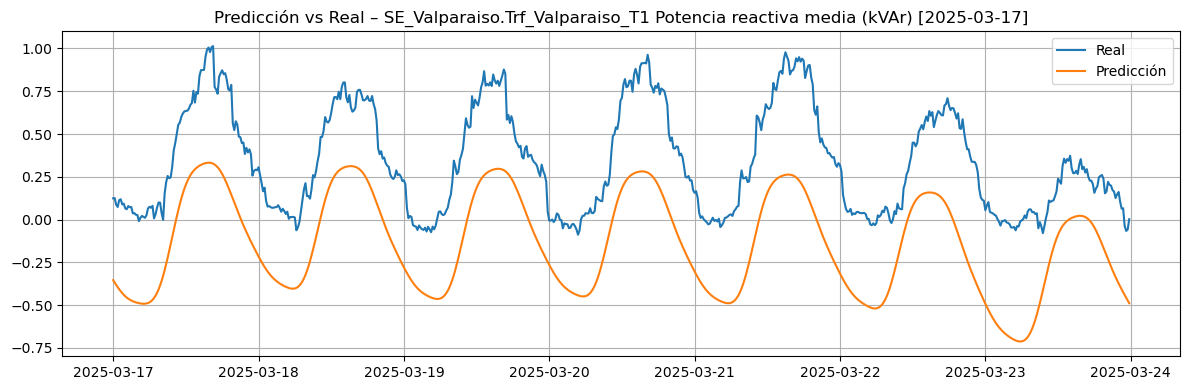

Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.104 | RMSE: 0.124 | MAPE: nan%
 TEST (semana actual):
  MAE:  0.480 | RMSE: 0.493 | MAPE: 67.31%

 Evaluando P para 2025-01-13


11:13:14 - cmdstanpy - INFO - Chain [1] start processing
11:13:27 - cmdstanpy - INFO - Chain [1] done processing


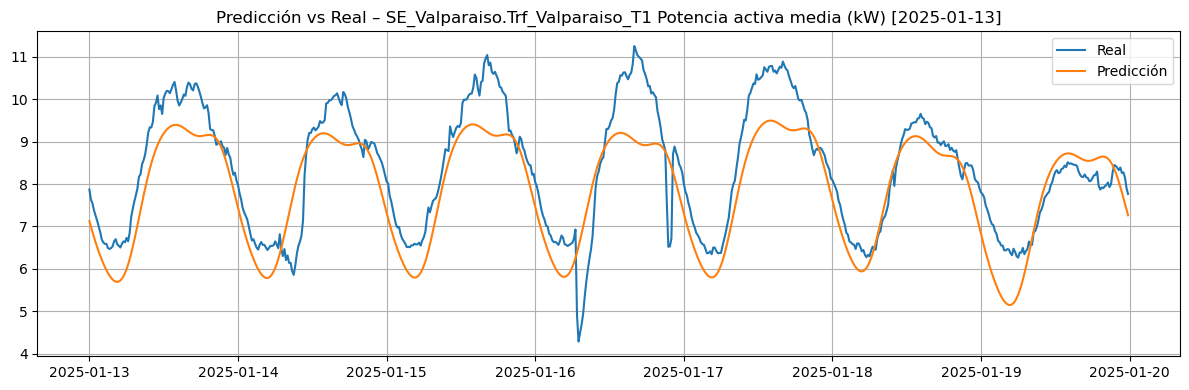

Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.881 | RMSE: 1.022 | MAPE: 12.89%
 TEST (semana actual):
  MAE:  0.674 | RMSE: 0.807 | MAPE: 8.32%

 Evaluando Q para 2025-01-13


11:13:28 - cmdstanpy - INFO - Chain [1] start processing
11:13:36 - cmdstanpy - INFO - Chain [1] done processing


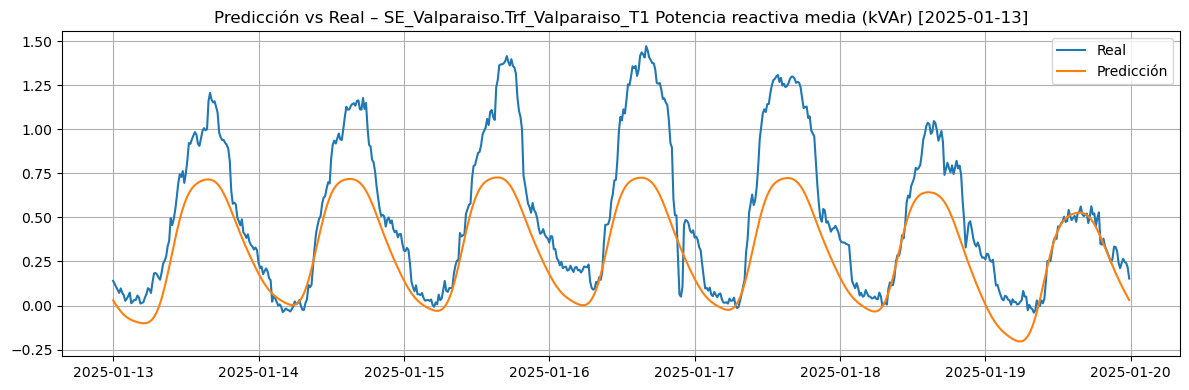

Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.195 | RMSE: 0.244 | MAPE: 36.65%
 TEST (semana actual):
  MAE:  0.211 | RMSE: 0.278 | MAPE: 43.49%

 Evaluando P para 2024-10-21


11:13:37 - cmdstanpy - INFO - Chain [1] start processing
11:13:51 - cmdstanpy - INFO - Chain [1] done processing


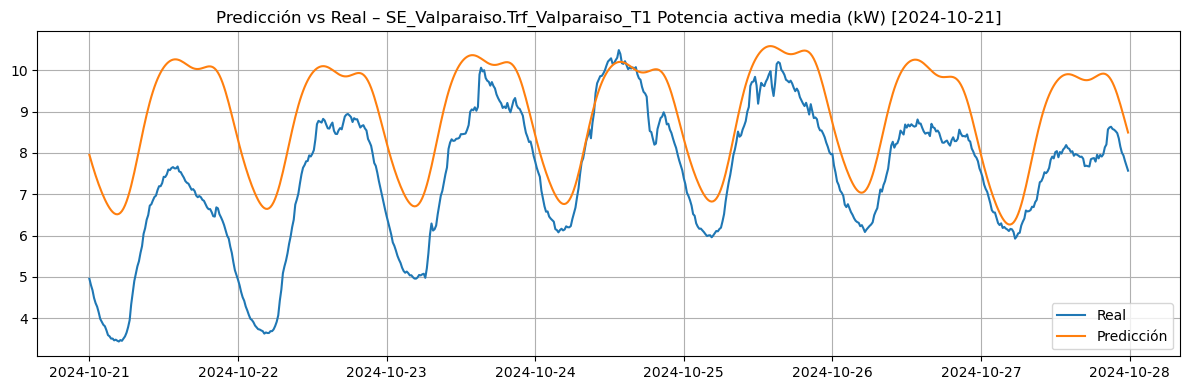

Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.635 | RMSE: 1.071 | MAPE: 9.77%
 TEST (semana actual):
  MAE:  1.459 | RMSE: 1.721 | MAPE: 23.31%

 Evaluando Q para 2024-10-21


11:13:51 - cmdstanpy - INFO - Chain [1] start processing
11:14:01 - cmdstanpy - INFO - Chain [1] done processing


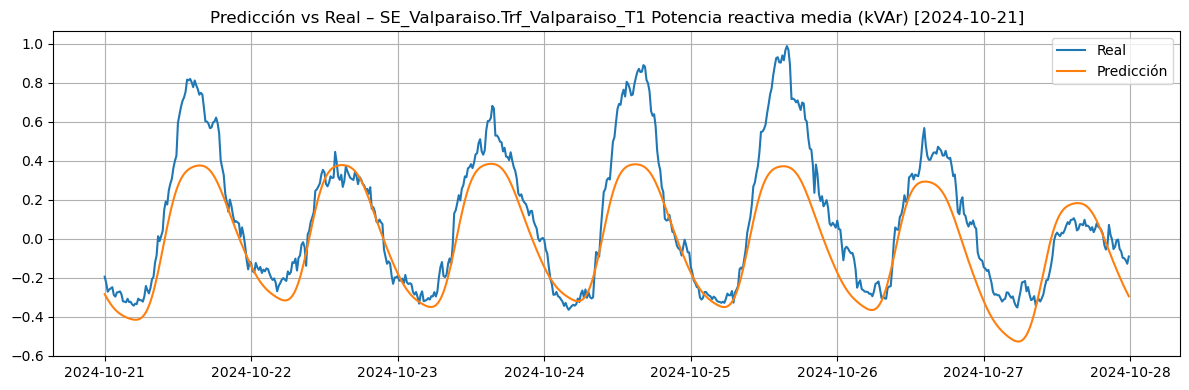

Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.111 | RMSE: 0.136 | MAPE: nan%
 TEST (semana actual):
  MAE:  0.136 | RMSE: 0.184 | MAPE: nan%

 Evaluando P para 2024-07-10


11:14:02 - cmdstanpy - INFO - Chain [1] start processing
11:14:08 - cmdstanpy - INFO - Chain [1] done processing


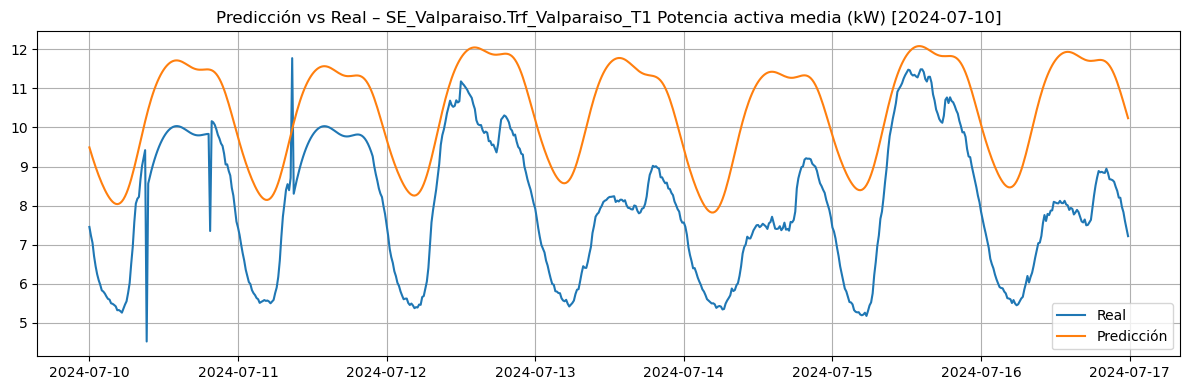

Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.790 | RMSE: 1.012 | MAPE: 11.10%
 TEST (semana actual):
  MAE:  2.396 | RMSE: 2.564 | MAPE: 33.09%

 Evaluando Q para 2024-07-10


11:14:08 - cmdstanpy - INFO - Chain [1] start processing
11:14:10 - cmdstanpy - INFO - Chain [1] done processing


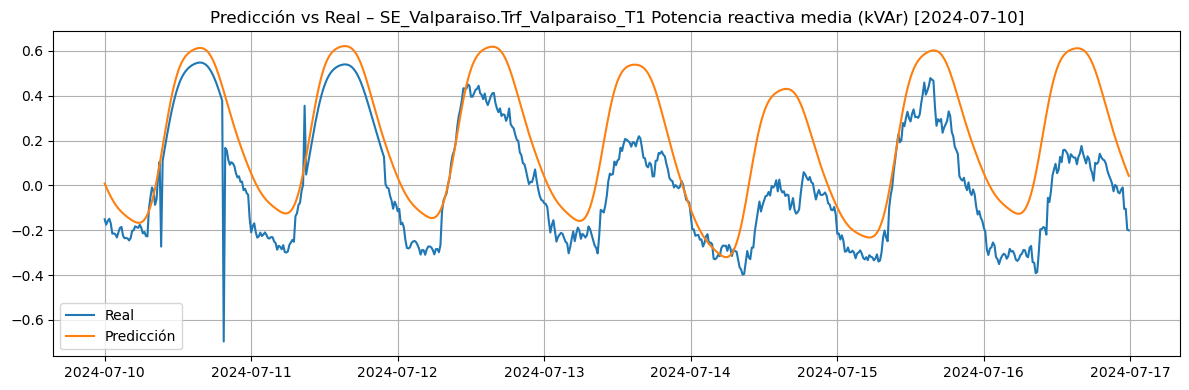

Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.106 | RMSE: 0.131 | MAPE: nan%
 TEST (semana actual):
  MAE:  0.185 | RMSE: 0.228 | MAPE: nan%

 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.443013    0.681206    6.216233  1.089542   1.215727   
1        2025-01-13   0.881440    1.022235   12.888212  0.673918   0.807336   
2        2024-10-21   0.635342    1.071022    9.765715  1.458853   1.721421   
3        2024-07-10   0.790161    1.012050   11.104441  2.396037   2.564302   

   MAPE_test variable  
0  13.390523        P  
1   8.323213        P  
2  23.309400        P  
3  33.091320        P  

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.104030    0.124061         NaN  0.480392   0.493228   
1        2025-01-13   0.194706    0.243604   36.645003  0.211397   0.278330   
2        2024-10-21

In [35]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)'
columna_q = 'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)'

resultados_p = []
resultados_q = []

for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_estacion(df_transformadores, columna_p, fecha)
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet_parametros_estacion(df_transformadores, columna_q, fecha)
    resultado_q['fecha_inicio_test'] = fecha
    resultado_q['variable'] = 'Q'
    resultados_q.append(resultado_q)

df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)


## Modelo base + regresor estacion + meteo


Evaluando P para 2025-03-17


11:14:11 - cmdstanpy - INFO - Chain [1] start processing
11:14:39 - cmdstanpy - INFO - Chain [1] done processing


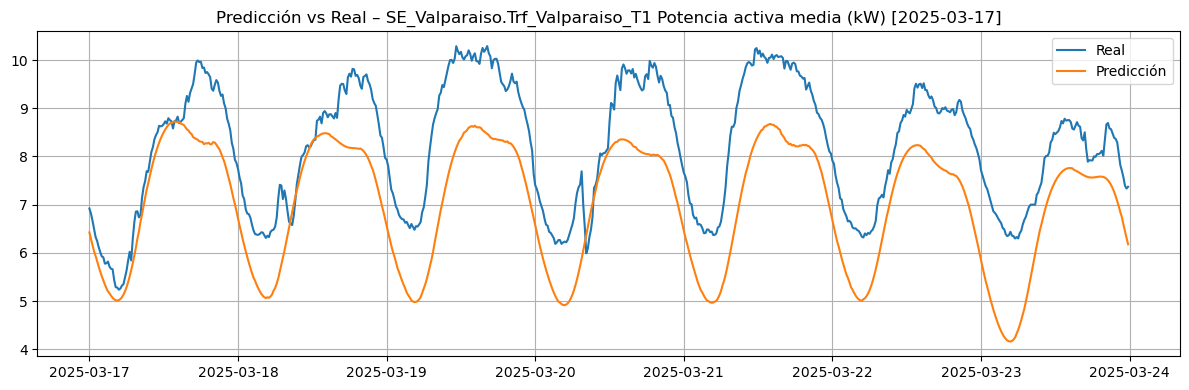


Evaluando Q para 2025-03-17


11:14:40 - cmdstanpy - INFO - Chain [1] start processing
11:15:05 - cmdstanpy - INFO - Chain [1] done processing


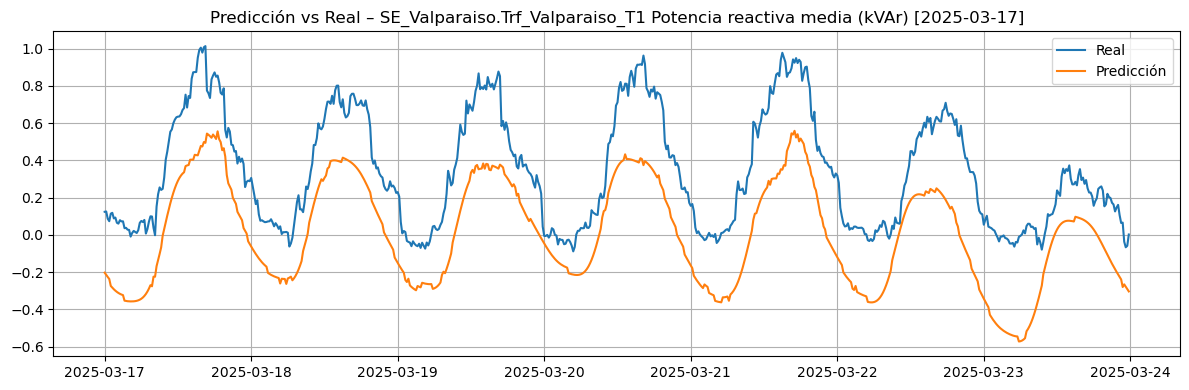


Evaluando P para 2025-01-13


11:15:05 - cmdstanpy - INFO - Chain [1] start processing
11:15:17 - cmdstanpy - INFO - Chain [1] done processing


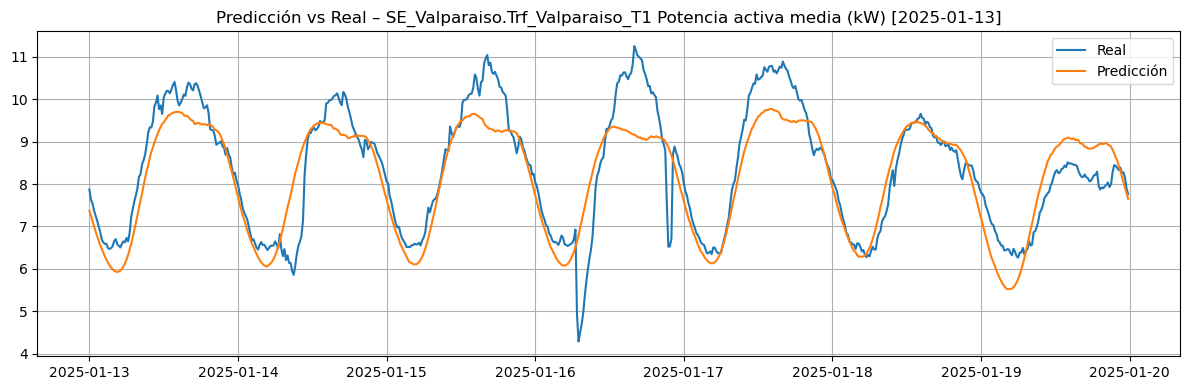


Evaluando Q para 2025-01-13


11:15:18 - cmdstanpy - INFO - Chain [1] start processing
11:15:37 - cmdstanpy - INFO - Chain [1] done processing


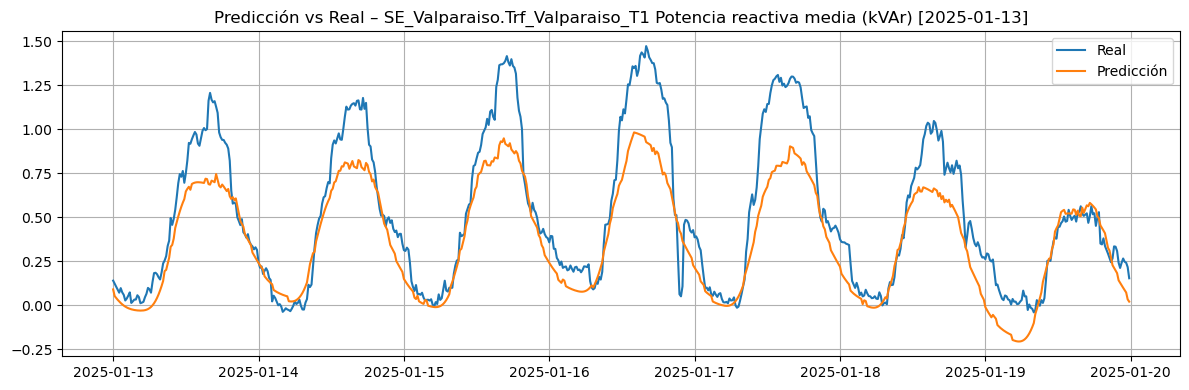


Evaluando P para 2024-10-21


11:15:38 - cmdstanpy - INFO - Chain [1] start processing
11:16:09 - cmdstanpy - INFO - Chain [1] done processing


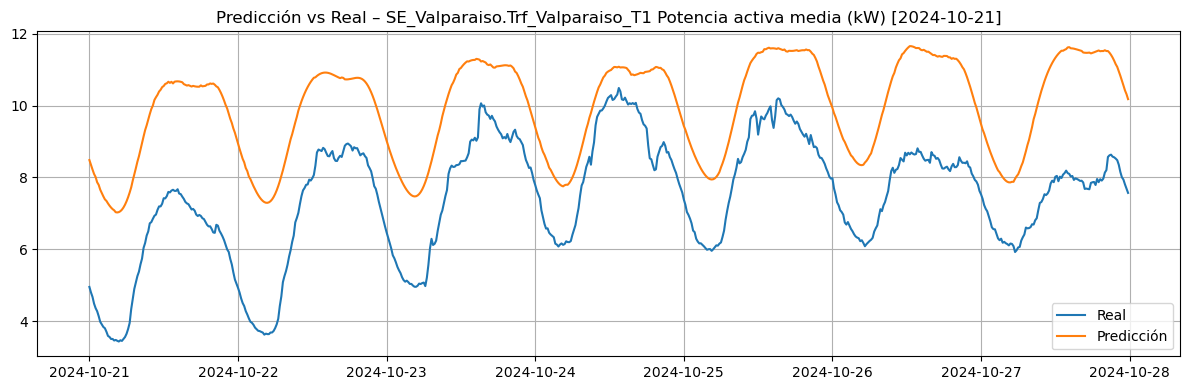


Evaluando Q para 2024-10-21


11:16:10 - cmdstanpy - INFO - Chain [1] start processing
11:16:20 - cmdstanpy - INFO - Chain [1] done processing


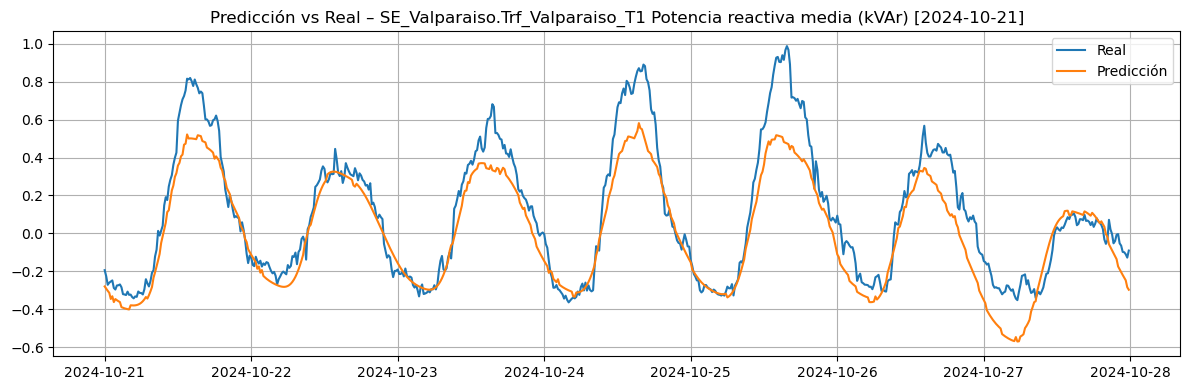


Evaluando P para 2024-07-10


11:16:21 - cmdstanpy - INFO - Chain [1] start processing
11:16:34 - cmdstanpy - INFO - Chain [1] done processing


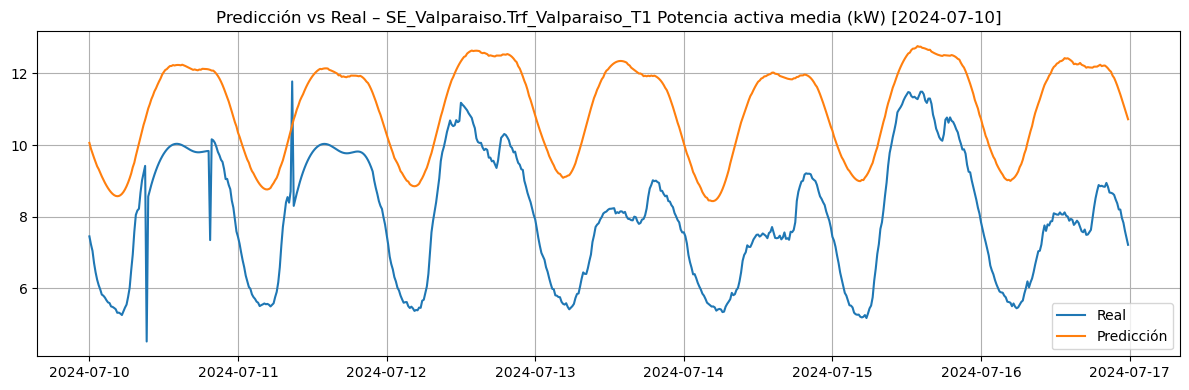


Evaluando Q para 2024-07-10


11:16:34 - cmdstanpy - INFO - Chain [1] start processing
11:16:36 - cmdstanpy - INFO - Chain [1] done processing


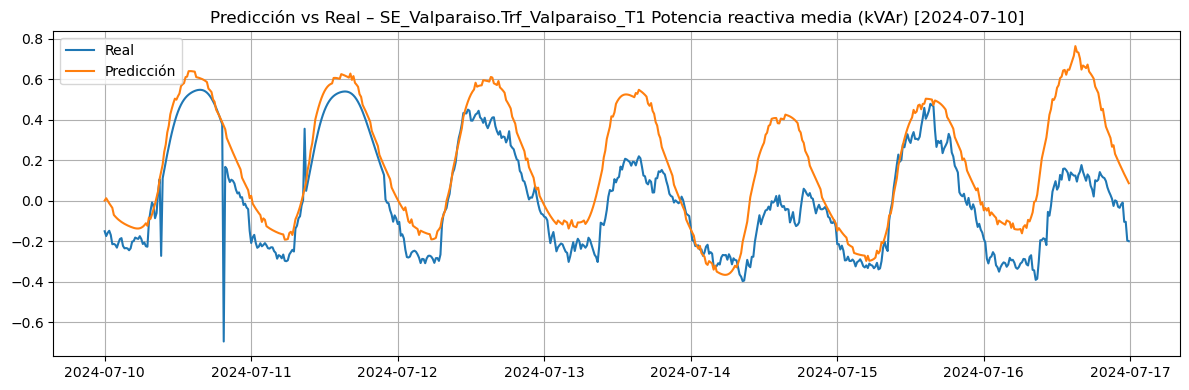


Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.440340    0.679551    6.194808  1.198140   1.320761   
1        2025-01-13   0.870697    1.025703   12.778990  0.536146   0.710588   
2        2024-10-21   0.634981    1.061356    9.735268  2.481616   2.606995   
3        2024-07-10   0.762840    0.974075   10.744810  2.976163   3.108225   

   MAPE_test variable  
0  14.759188        P  
1   6.664052        P  
2  37.402776        P  
3  40.691590        P  

Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.101661    0.119065         NaN  0.330967   0.348675   
1        2025-01-13   0.170119    0.198075   25.498546  0.161862   0.213906   
2        2024-10-21   0.105000    0.129174         NaN  0.112308   0.149514   
3        2024-07-10   0.094224    0.117021         NaN  0.165862   0.218318   

   MAPE_test variabl

In [37]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)'
columna_q = 'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)'

# Nombre de estación meteorológica asociada al transformador
nombre_estacion = 'Baron'

# Resultados
resultados_p = []
resultados_q = []

for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_estacion_meteo(
        df_transformadores,
        columna_objetivo=columna_p,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

    print(f"\nEvaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet_parametros_estacion_meteo(
        df_transformadores,
        columna_objetivo=columna_q,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_q['fecha_inicio_test'] = fecha
    resultado_q['variable'] = 'Q'
    resultados_q.append(resultado_q)

# Convertir resultados a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\nResultados Potencia Activa (P):")
print(df_resultados_p)

print("\nResultados Potencia Reactiva (Q):")
print(df_resultados_q)
